In [1]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
#from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.16/00


In [2]:
directory = '/mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/qcd/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190626/'
#name_string = 'QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
name_string1 = 'ntuple_RunIIFall17_QCD_'
name_string2 = '_TuneCP5_13TeV_pythia8.root'

PT = 'Pt_15to30'

fpath = directory + name_string1 + PT + name_string2
print (PT, fpath)
    
print ('File ready')
 

root_dir = uproot.open(fpath) 
print ('Open ready')

tree = root_dir['ntuples/llp']
print ('Tree ready')



Pt_15to30 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/qcd/ntuple_RunIIFall17_QCD_Pt_15to30_TuneCP5_13TeV_pythia8.root
File ready
Open ready
Tree ready


# Basic Variables

 FCN=30.4027 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=7.5609e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.50257e+02   1.05976e+01   2.35397e-02   1.85740e-06
   2  Mean         1.58014e-03   1.85726e-03   5.08064e-06  -5.95872e-02
   3  Sigma        1.40209e-01   1.33683e-03   7.02197e-06   2.04677e-02


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCDGenTime_leading.png has been created


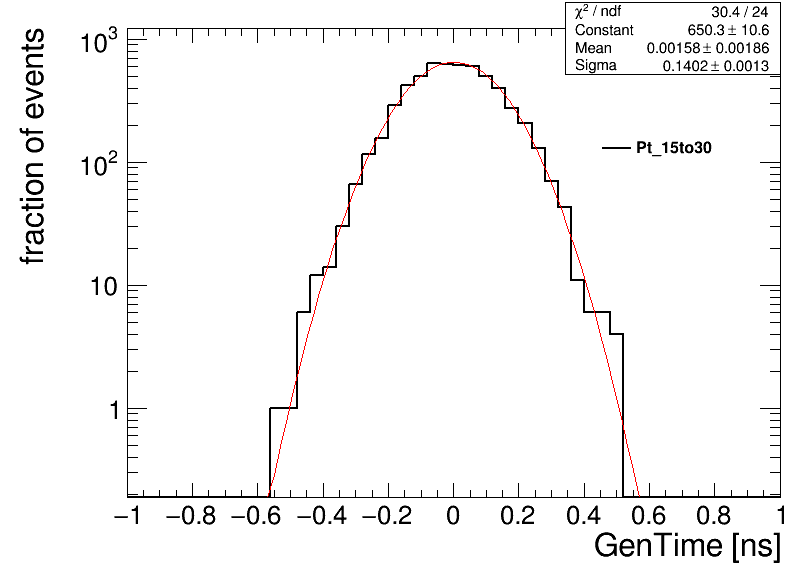

In [3]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['genQCD_time'].array()
# weight = tree['weight'].array()
t = jetTime[:,0]
ht0 = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCDGenTime_leading.png')


 FCN=14.9888 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=9.22042e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.57379e+02   1.08264e+01   1.69516e-02   1.27810e-06
   2  Mean         4.16814e-03   1.84268e-03   3.59117e-06   3.50365e-03
   3  Sigma        1.39224e-01   1.37142e-03   5.11680e-06   3.76760e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCDGenTime_subleading.png has been created


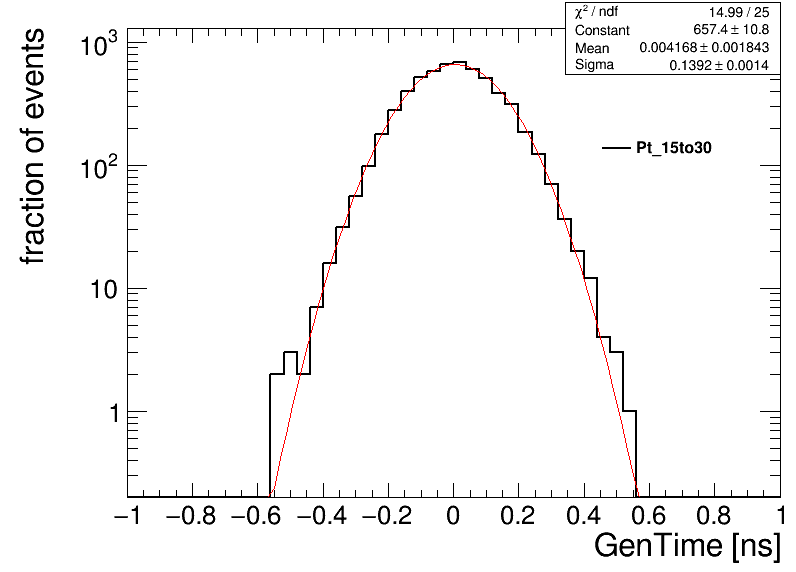

In [4]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['genQCD_time'].array()
# weight = tree['weight'].array()
t = jetTime[:,1]
ht0 = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCDGenTime_subleading.png')


 FCN=24.6379 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.50584e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.78729e+03   1.90508e+01   3.84790e-02  -1.24347e-06
   2  Mean         1.47343e-03   1.02688e-03   2.53868e-06  -4.11150e-03
   3  Sigma        1.17763e-01   7.25743e-04   4.14296e-06  -1.17646e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCD_Gen_Vtx_Time.png has been created


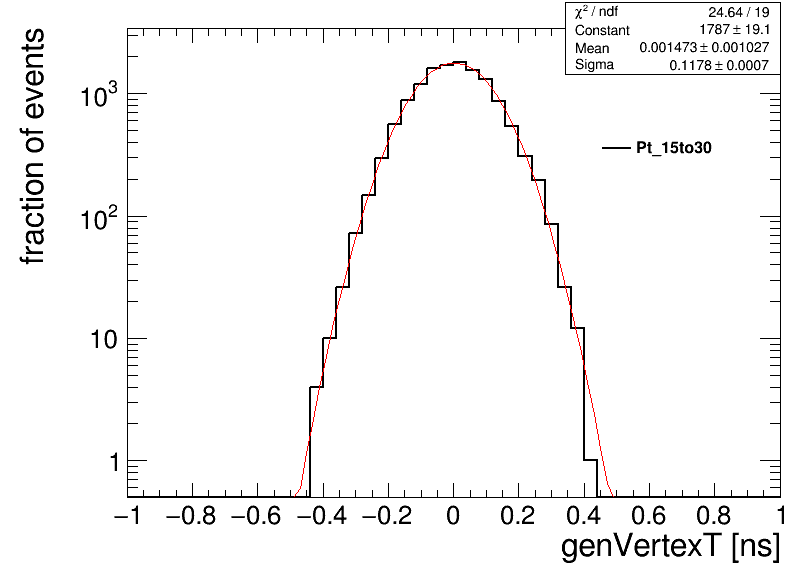

In [5]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['genVertexT'].array()
# weight = tree['weight'].array()
t = jetTime
ht0 = create_TH1D( t, axis_title=['genVertexT [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCD_Gen_Vtx_Time.png')


 FCN=35.5151 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=7.3658e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.20437e+03   1.27430e+01   3.09575e-02  -1.62745e-06
   2  Mean         8.65375e-01   3.04600e-02   8.98727e-05  -1.25868e-02
   3  Sigma        3.49227e+00   2.10179e-02   4.86295e-06  -1.02591e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCD_Gen_Vtx_Z.png has been created


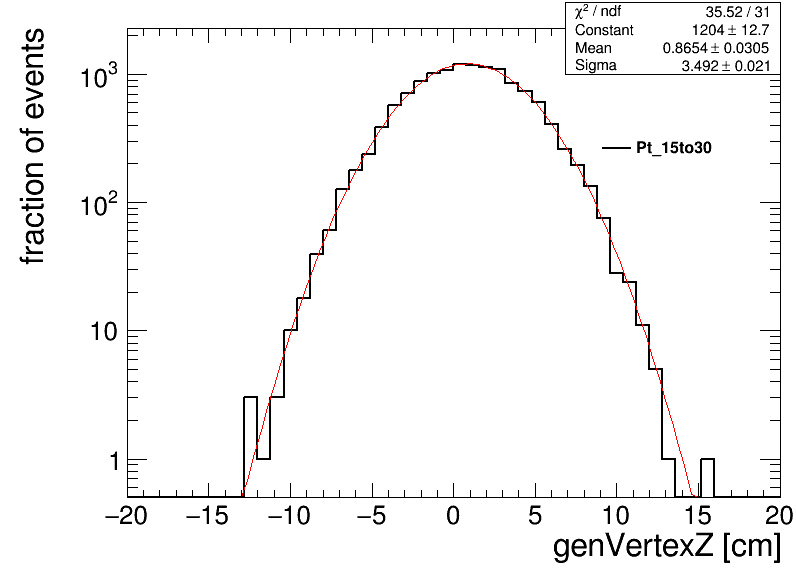

In [6]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

VtxZ = tree['genVertexZ'].array()
# weight = tree['weight'].array()
z = VtxZ
ht0 = create_TH1D( z, axis_title=['genVertexZ [cm]', 'fraction of events'], name=PT, binning=[50,-20,20])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCD_Gen_Vtx_Z.png')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCD_Gen_Pt.png has been created


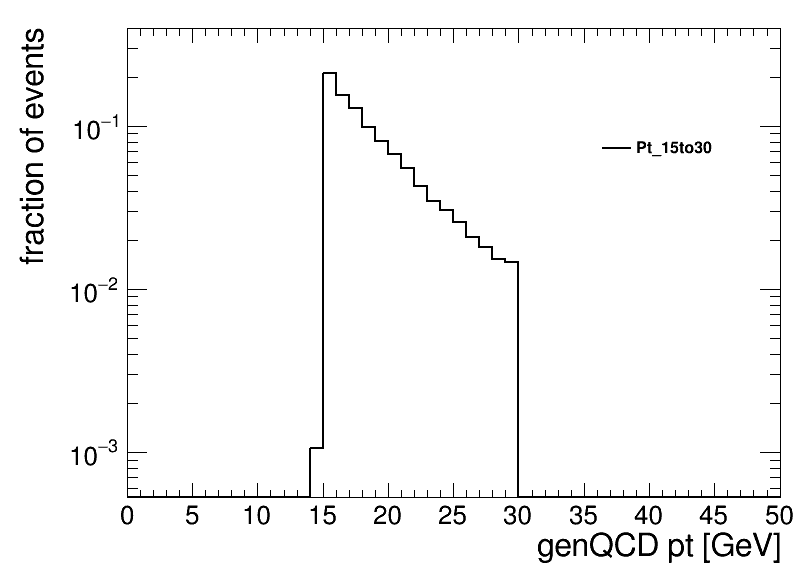

In [12]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

Pt = tree['genQCD_pt'].array()
# weight = tree['weight'].array()
pt = Pt[:,0]
ht0 = create_TH1D( pt, axis_title=['genQCD pt [GeV]', 'fraction of events'], name=PT, binning=[50,0,50])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
# ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCD_Gen_Pt.png')


# Calculation quadrature

In [7]:
sigma_z = 4.2 #cm
sigma_t = 193. #ps
c = 0.03 #cm/ps

In [8]:
sigma_gen_t = 140. #ps
sigma_vtx_t = 118. #ps
sigma_vtx_z = 3.5 #cm

In [9]:
#missing part in z
miss_z = math.sqrt( math.pow(sigma_z/c,2) - math.pow(sigma_vtx_z/c,2) )
print(miss_z)

77.38791177495933


In [10]:
#missing part in z and t
miss = math.sqrt( math.pow(miss_z,2) + math.pow(sigma_t,2) )
print(miss, 'ps')

207.93722343267183 ps


# Add Single Gaussian distribution

0 0.208


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/SmearTime208ps.png has been created


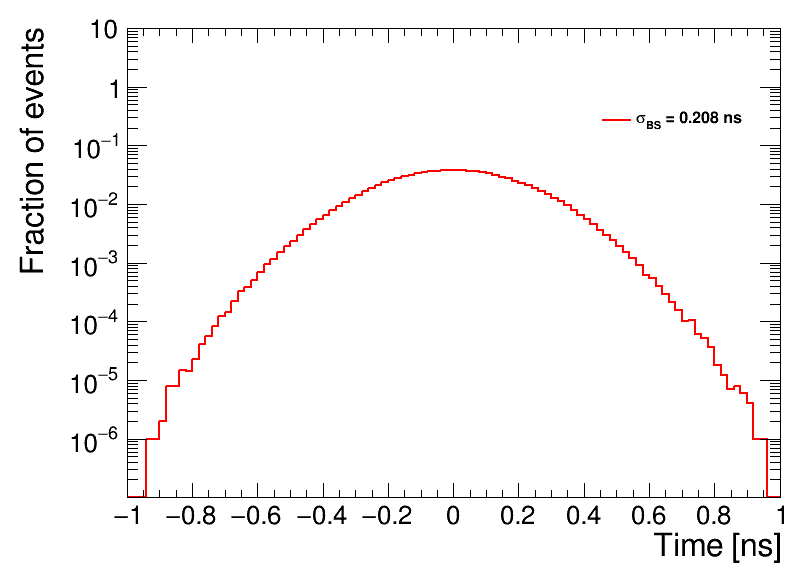

In [3]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.208]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-1,1])
    hs[i].SetLineColor(std_color_list[i+1])
    hs[i].SetMarkerColor(std_color_list[i+1])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime208ps.png')


In [4]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts = []
Seconds = []

jetGenTime = tree['genQCD_time'].array()
BSTime = tree['genVertexT'].array()

jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
print(jetGenTime[0],BSTime[0], jetTime[0])

for j,sig in enumerate(sigma):
    print(j,sig)
    n = i*len(sigma)+j
    print('n',n)
    print(i, j, n,len(BSTime))
    SmearTime = np.random.normal(0,sig,len(BSTime))
    jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
    print(jetTime[0],SmearTime[0], jetNewTime[0])    

19
1
13212
[ 0.04179688 -0.02122144] -0.012544435 [ 0.05434132 -0.008677  ]
0 0.208
n 0
0 0 0 13212
[ 0.05434132 -0.008677  ] -0.2493100340519395 [-0.19496872 -0.25798702]


 FCN=22.2857 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=2.2152e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.13996e+02   6.76083e+00   1.28970e-02  -3.42083e-06
   2  Mean         1.99903e-03   2.92700e-03   6.88802e-06   2.98365e-04
   3  Sigma        2.20586e-01   2.12422e-03   6.10865e-06  -7.21046e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCDNewTime_leading.png has been created


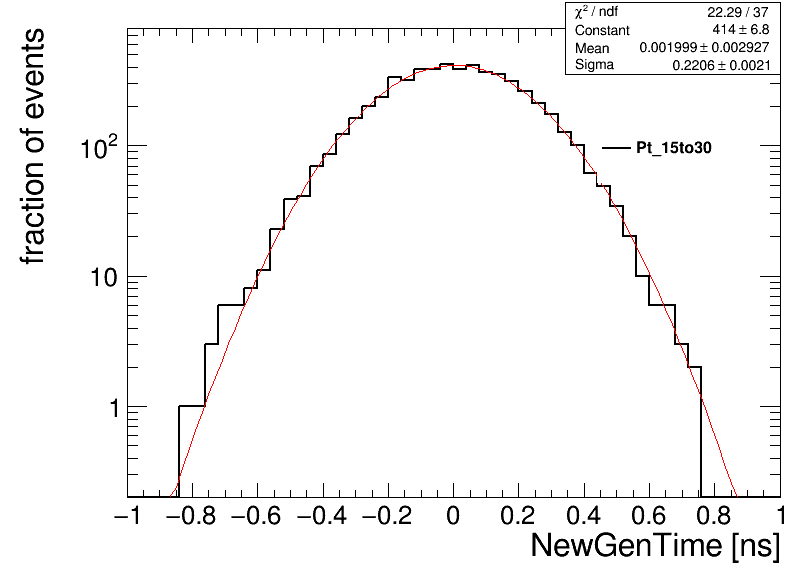

In [5]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetNewTime = np.array(jetNewTime)
t = jetNewTime[:,0]
ht0 = create_TH1D( t, axis_title=['NewGenTime [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCDNewTime_leading.png')


 FCN=28.5141 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.54734e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.11622e+02   6.67248e+00   1.44353e-02   2.70014e-07
   2  Mean         1.88642e-03   2.94688e-03   7.81691e-06   2.75351e-04
   3  Sigma        2.21967e-01   2.09939e-03   6.79192e-06   5.00626e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCDNewTime_subleading.png has been created


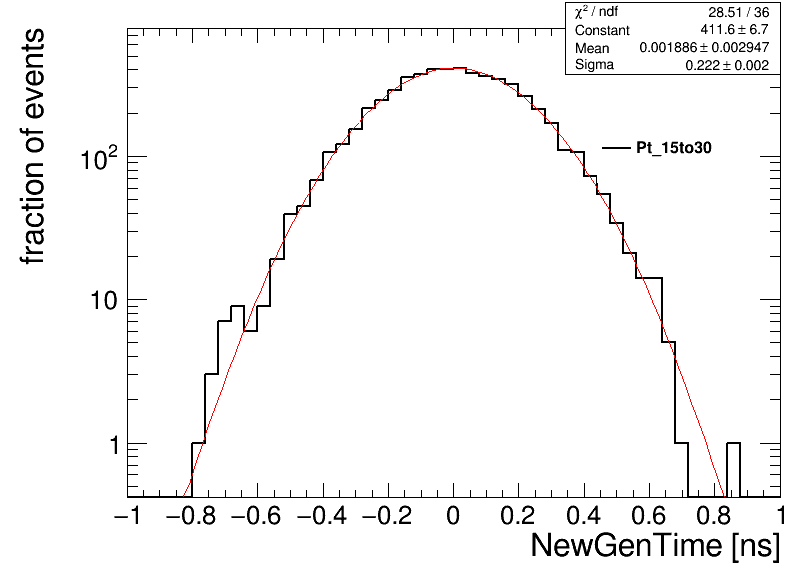

In [6]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetNewTime = np.array(jetNewTime)
t = jetNewTime[:,1]
ht0 = create_TH1D( t, axis_title=['NewGenTime [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCDNewTime_subleading.png')


In [7]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts = []
Seconds = []

jetEta = tree['genQCD_eta'].array()

jetGenTime = tree['genQCD_time'].array()
BSTime = tree['genVertexT'].array()

jetGenTime = jetGenTime[np.logical_andjetEta<1.5]

jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
print(jetGenTime[0],BSTime[0], jetTime[0])

for j,sig in enumerate(sigma):
    print(j,sig)
    n = i*len(sigma)+j
    print('n',n)
    print(i, j, n,len(BSTime))
    SmearTime = np.random.normal(0,sig,len(BSTime))
    jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
    print(jetTime[0],SmearTime[0], jetNewTime[0])    

19
1
13212


AttributeError: module 'numpy' has no attribute 'logical_andjetEta'

 FCN=22.2857 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.21329e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.13996e+02   6.76083e+00   1.28970e-02  -3.41929e-06
   2  Mean         1.99903e-03   2.92700e-03   6.88802e-06   2.96347e-04
   3  Sigma        2.20586e-01   2.12422e-03   6.10865e-06  -7.20771e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: Pt_15to30 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/QCDNewTime_leading_Eta1p5.png has been created


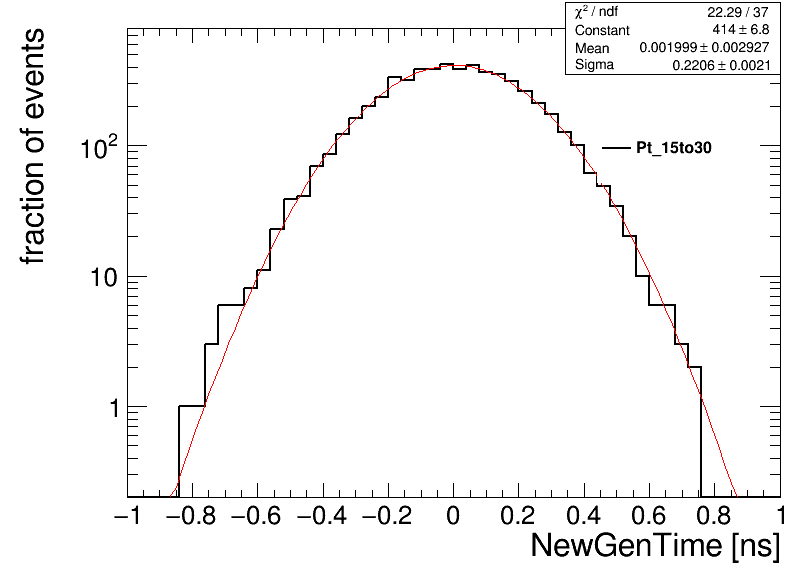

In [17]:
# plot gen jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.80);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetNewTime = np.array(jetNewTime)
t = jetNewTime[:,0]
ht0 = create_TH1D( t, axis_title=['NewGenTime [ns]', 'fraction of events'], name=PT, binning=[50,-1,1])
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,PT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'QCDNewTime_leading_Eta1p5.png')


# Rejection power

In [9]:
#sort lists based on list1 and require list1 to be valid
def sort_valid_lists(list1, list2): 
    list3 = []
    for index, (ele1,ele2) in enumerate(zip(list1,list2)): 
#         print(index,ele1,ele2)
        if not math.isnan(ele1):
#             print("ele1 is not nan")
            list3.append(tuple((ele1,ele2)))
    list3.sort(key=lambda x: x[0])
    return list3 

In [10]:
#find most delayed and second delayed qcd jets
jetTime_most_delayed = []
jetTime_second_delayed = []

jetPt = tree['genQCD_pt'].array()
jetEta = tree['genQCD_eta'].array()

for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
#     print(i,time,pt,len(time),len(pt))
    validpairlist = sort_valid_lists(time,pt)
#     print(validpairlist)
#     print(validpairlist[-1][0])
    jetTime_most_delayed.append(validpairlist[-1][0])
    jetTime_second_delayed.append(validpairlist[-2][0])
#     if evt>2:
#         break
jetTime_most_delayed = np.array(jetTime_most_delayed)
jetTime_second_delayed = np.array(jetTime_second_delayed)
print(len(jetTime_most_delayed),len(jetTime_second_delayed))


13212 13212


In [12]:
i = 0
Power_1j = []
Power_2j = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8]
# t_cuts = [0.,1.,2.,3.,4.]
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.5,0.6,0.8,1.,2.,3.,4.]
N = len(jetTime_most_delayed)
# print(t_cuts)

num = len(t_cuts)
print(num)

t1 = jetTime_most_delayed
t2 = jetTime_second_delayed

for p in range(0,num):
    q = t_cuts[p]
#         print(j,sig,p,q)
    t1_string = np.logical_and( t1 > q, t1)
    t2_string = np.logical_and( t2 > q, t2)
    t_string = np.logical_and( t1_string, t2_string)

    t1cutted_t1 = t1[t1_string]
    tcutted_t1 = t1[t_string]

    Nsel1 = np.shape(t1cutted_t1)[0]
    Nsel2 = np.shape(tcutted_t1)[0]
#         print(q,Nsel)
    if Nsel1==0 or Nsel2==0:
        break
#         Nrej = 1.*N - 1.*Nsel
    Prej_1j = 1.0*N/Nsel1
    Prej_2j = 1.0*N/Nsel2
    Power_1j.append(Prej_1j)
    Power_2j.append(Prej_2j)
    print('t cut: ',q, 'rej power1j: ',Prej_1j)
    print('t cut: ',q, 'rej power 2j: ',Prej_2j)

    
Power_1j = np.array(Power_1j)
Power_2j = np.array(Power_2j)
print(t_cuts)
print(Power_1j)
print(Power_2j)


19
t cut:  -5.0 rej power1j:  1.4515491100856954
t cut:  -5.0 rej power 2j:  5.525721455457967
t cut:  -4.0 rej power1j:  1.4515491100856954
t cut:  -4.0 rej power 2j:  5.525721455457967
t cut:  -3.0 rej power1j:  1.4515491100856954
t cut:  -3.0 rej power 2j:  5.525721455457967
t cut:  -2.0 rej power1j:  1.4515491100856954
t cut:  -2.0 rej power 2j:  5.525721455457967
t cut:  -1.0 rej power1j:  1.4515491100856954
t cut:  -1.0 rej power 2j:  5.525721455457967
t cut:  -0.8 rej power1j:  1.4517086034501703
t cut:  -0.8 rej power 2j:  5.525721455457967
t cut:  -0.6 rej power1j:  1.456028212475204
t cut:  -0.6 rej power 2j:  5.579391891891892
t cut:  -0.4 rej power1j:  1.4969408565601632
t cut:  -0.4 rej power 2j:  5.864181091877497
t cut:  -0.2 rej power1j:  1.7436980335225023
t cut:  -0.2 rej power 2j:  7.118534482758621
t cut:  0.0 rej power1j:  2.7891070297656744
t cut:  0.0 rej power 2j:  12.789932236205228
t cut:  0.2 rej power1j:  7.364548494983278
t cut:  0.2 rej power 2j:  38.63157

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/RejectionPower_SmearNewTime.png has been created


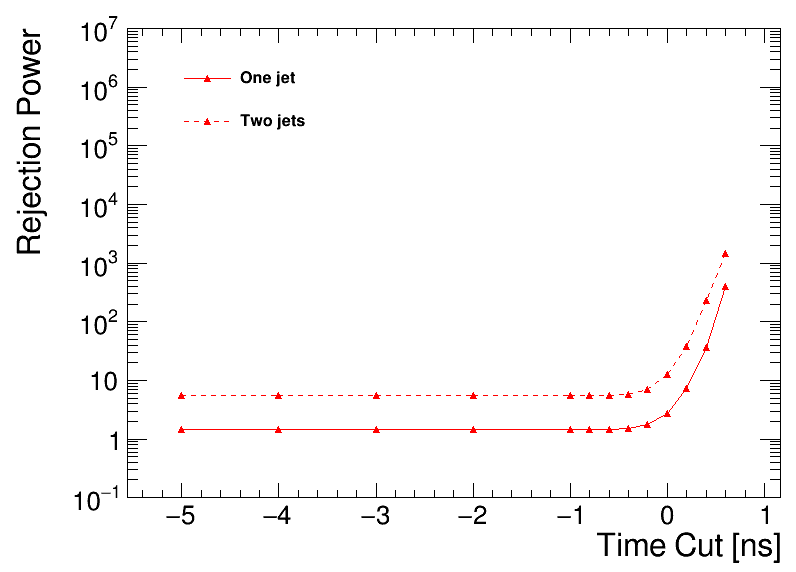

In [18]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

power1 = Power_1j 
power2 = Power_2j 
#print num, t_cuts, power
num1 = len(power1)
num2 = len(power2)
#     num = len(t_cuts)+i-4
hrej1 = rt.TGraph(num1 , t_cuts, power1)
hrej2 = rt.TGraph(num2 , t_cuts, power2)

hrej1.SetLineColor(std_color_list[i+1])
hrej1.SetMarkerColor(std_color_list[i+1])
hrej1.SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)

hrej2.SetLineColor(std_color_list[i+1])
hrej2.SetLineStyle(7)
hrej2.SetMarkerColor(std_color_list[i+1])
hrej2.SetMarkerStyle(22+i)

leg.SetBorderSize(0)
# leg.SetHeader('New Gen Time')
leg.AddEntry(hrej1,'One jet')
leg.AddEntry(hrej2,'Two jets')

hrej1.SetTitle( 'Rejection Power' )
hrej1.GetXaxis().SetTitle( 'Time Cut [ns]' )
#hrej[m].GetXaxis().SetRangeUser(-10,10)
hrej1.GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
hrej1.GetYaxis().SetTitle( 'Rejection Power' )
#     if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
hrej1.Draw('ALPsame')
hrej2.Draw('LPsame')
#     else:
#         hrej[i].Draw('LPsame')

#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearNewTime.png')


# Trigger w/ Eta cut

In [13]:
#find leading and subleading qcd jets
jetPt_leading = []
jetPt_subleading = []

jetPt = tree['genQCD_pt'].array()
jetEta = tree['genQCD_eta'].array()

for evt, (pt, eta) in enumerate(zip(jetPt,jetEta)):
#     print(i,pt,eta,len(pt),len(eta))
    validpairlist = sort_valid_lists(pt,eta)
#     print(validpairlist)
#     print(validpairlist[-1][0])
    jetPt_leading.append(validpairlist[-1][0])
    jetPt_subleading.append(validpairlist[-2][0])
#     if evt>2:
#         break
jetPt_leading = np.array(jetPt_leading)
jetPt_subleading = np.array(jetPt_subleading)
print(len(jetPt_leading),len(jetPt_subleading))


13212 13212


In [14]:
#find leading and subleading qcd jets' eta
jetPt_leading_eta = []
jetPt_subleading_eta = []

jetPt = tree['genQCD_pt'].array()
jetEta = tree['genQCD_eta'].array()

for evt, (pt, eta) in enumerate(zip(jetPt,jetEta)):
#     print(i,pt,eta,len(pt),len(eta))
    validpairlist = sort_valid_lists(pt,eta)
#     print(validpairlist)
#     print(validpairlist[-1][0])
    jetPt_leading_eta.append(validpairlist[-1][1])
    jetPt_subleading_eta.append(validpairlist[-2][1])
#     if evt>2:
#         break
jetPt_leading_eta = np.array(jetPt_leading_eta)
jetPt_subleading_eta = np.array(jetPt_subleading_eta)
print(len(jetPt_leading_eta),len(jetPt_subleading_eta))


13212 13212


In [15]:
#find most delayed and second delayed qcd jets' eta
jetTime_most_delayed_eta = []
jetTime_second_delayed_eta = []

jetPt = tree['genQCD_pt'].array()
jetEta = tree['genQCD_eta'].array()

for evt, (time, eta) in enumerate(zip(jetNewTime,jetEta)):
#     print(i,time,eta,len(time),len(eta))
    validpairlist = sort_valid_lists(time,eta)
#     print(validpairlist)
#     print(validpairlist[-1][0])
    jetTime_most_delayed_eta.append(validpairlist[-1][1])
    jetTime_second_delayed_eta.append(validpairlist[-2][1])
#     if evt>2:
#         break
jetTime_most_delayed_eta = np.array(jetTime_most_delayed_eta)
jetTime_second_delayed_eta = np.array(jetTime_second_delayed_eta)
print(len(jetTime_most_delayed_eta),len(jetTime_second_delayed_eta))


13212 13212


In [22]:
#find most delayed and second delayed qcd jets
jetTime_most_delayed = []
jetTime_second_delayed = []

jetPt = tree['genQCD_pt'].array()
jetEta = tree['genQCD_eta'].array()

for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
#     print(i,time,pt,len(time),len(pt))
    validpairlist = sort_valid_lists(time,pt)
#     print(validpairlist)
#     print(validpairlist[-1][0])
    jetTime_most_delayed.append(validpairlist[-1][0])
    jetTime_second_delayed.append(validpairlist[-2][0])
#     if evt>2:
#         break
jetTime_most_delayed = np.array(jetTime_most_delayed)
jetTime_second_delayed = np.array(jetTime_second_delayed)
print(len(jetTime_most_delayed),len(jetTime_second_delayed))


13212 13212


In [23]:
a = 1.5
b = -1.5
c = abs(b)
print(c)

1.5


In [36]:
i = 0
Power_1J = []
Power_2J = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0,0.2,0.4,0.5,0.6,0.8]
# t_cuts = [0.,1.,2.,3.,4.]
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4, 0.5, 0.6,0.8,1.,2.,3.,4.]
pt_cuts = [0,20,30,40,50,60]
N = len(jetTime_most_delayed)
# print(t_cuts)

num = len(t_cuts)
print(num)

t1 = jetTime_most_delayed
eta_t1 = jetTime_most_delayed_eta
t2 = jetTime_second_delayed
eta_t2 = jetTime_second_delayed_eta

pt1 = jetPt_leading
eta_pt1 = jetPt_leading_eta
pt2 = jetPt_subleading
eta_pt2 = jetPt_subleading_eta

for npt,pt in enumerate(pt_cuts):
    print(npt,pt)
    
    pt1_string = np.logical_and( pt1 > q, abs(eta_pt1)<1.5)
    pt2_string = np.logical_and( pt2 > q, abs(eta_pt2)<1.5)
    pt_string = np.logical_and( pt1_string, pt2_string)
    
    eta_pt1_string = np.logical_and( eta_pt1, abs(eta_pt1)<1.5)
    eta_pt2_string = np.logical_and( eta_pt2, abs(eta_pt2)<1.5)
    eta_pt_string = np.logical_and( eta_pt1_string, eta_pt2_string)
    
    power1 = []
    power2 = []
    
    for p in range(0,num):
        q = t_cuts[p]
    #         print(j,sig,p,q)

        t1_string = np.logical_and( t1 > q, abs(eta_t1)<1.5)
        t2_string = np.logical_and( t2 > q, abs(eta_t2)<1.5)
        t_string = np.logical_and( t1_string, t2_string)

        pt_t1_string = np.logical_and( t1_string, pt1_string)
        pt_t_string = np.logical_and( t_string, pt_string)

        eta_t1_string = np.logical_and( eta_t1, abs(eta_t1)<1.5)
        eta_t2_string = np.logical_and( eta_t2, abs(eta_t2)<1.5)
        eta_t_string = np.logical_and( eta_t1_string, eta_t2_string)

        eta_pt_t1_string = np.logical_and( eta_t1_string, eta_pt1_string)
        eta_pt_t_string = np.logical_and( eta_t_string, eta_pt_string)


        t1cutted_t1 = t1[pt_t1_string]
        tcutted_t1 = t1[pt_t_string]

        Nsel1 = np.shape(t1cutted_t1)[0]
        Nsel2 = np.shape(tcutted_t1)[0]
    #         print(q,Nsel)
        if Nsel1==0 or Nsel2==0:
            break
    #         Nrej = 1.*N - 1.*Nsel

        eta_t1cutted_t1 = eta_t1[eta_pt_t1_string]
        eta_tcutted_t = eta_t1[eta_pt_t_string]

        N1 = np.shape(eta_t1cutted_t1)[0]
        N2 = np.shape(eta_tcutted_t)[0]

        Prej_1j = 1.0*N1/Nsel1
        Prej_2j = 1.0*N2/Nsel2
        power1.append(Prej_1j)
        power2.append(Prej_2j)
        if npt==0 :
            print('t cut: ',q, 'rej power1j: ',Prej_1j)
            print('t cut: ',q, 'rej power 2j: ',Prej_2j)
        
    power1 = np.array(power1)
    power2 = np.array(power2)
    
    if npt==0:
        print('rej 1j',power1)
        print('rej 2j',power2)
    
    Power_1J.append(power1)
    Power_2J.append(power2)

    
Power_1J = np.array(Power_1J)
Power_2J = np.array(Power_2J)
print(t_cuts)
print(Power_1J)
print(Power_2J)


19
0 0
t cut:  -5.0 rej power1j:  1.002257728377909
t cut:  -5.0 rej power 2j:  1.0138422818791946
t cut:  -4.0 rej power1j:  1.002257728377909
t cut:  -4.0 rej power 2j:  1.0138422818791946
t cut:  -3.0 rej power1j:  1.002257728377909
t cut:  -3.0 rej power 2j:  1.0138422818791946
t cut:  -2.0 rej power1j:  1.002257728377909
t cut:  -2.0 rej power 2j:  1.0138422818791946
t cut:  -1.0 rej power1j:  1.002257728377909
t cut:  -1.0 rej power 2j:  1.0138422818791946
t cut:  -0.8 rej power1j:  1.002257728377909
t cut:  -0.8 rej power 2j:  1.0138422818791946
t cut:  -0.6 rej power1j:  1.0052255704581083
t cut:  -0.6 rej power 2j:  1.023718763235917
t cut:  -0.4 rej power1j:  1.0327487473156765
t cut:  -0.4 rej power 2j:  1.0761353517364203
t cut:  -0.2 rej power1j:  1.2030435688972274
t cut:  -0.2 rej power 2j:  1.3064864864864865
t cut:  0.0 rej power1j:  1.9046204620462046
t cut:  0.0 rej power 2j:  2.3511673151750974
t cut:  0.2 rej power1j:  4.928266438941076
t cut:  0.2 rej power 2j:  7

0 0
1 20
2 30
3 40
4 50
5 60


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/RejectionPower_SmearNewTime_Eta1p5.png has been created


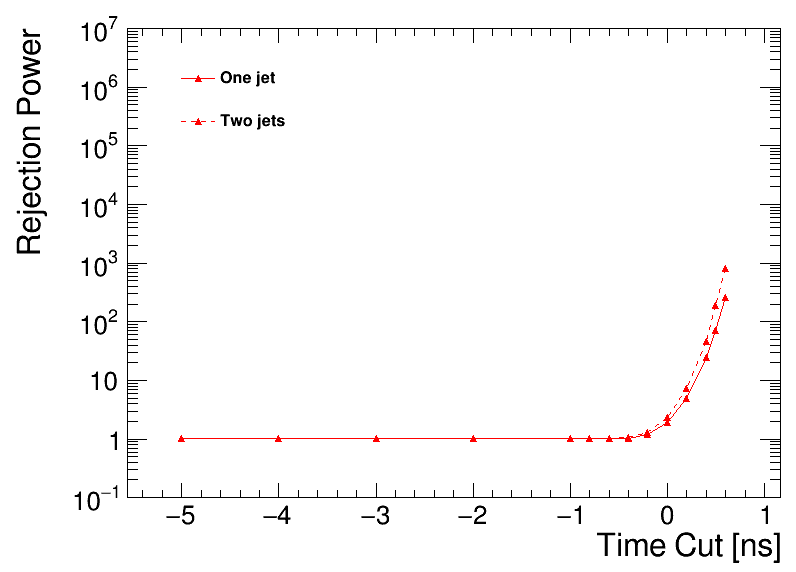

In [21]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg1 = rt.TLegend(0.22,0.75,0.45,0.90);
leg = rt.TLegend(0.45,0.65,0.55,0.92);
leg1.SetTextSize(0.03)
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for npt,pt in enumerate(pt_cuts):
    print(npt,pt)
    

    power1 = Power_1J[npt] 
    power2 = Power_2J[npt] 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
    hrej1[npt] = rt.TGraph(num1 , t_cuts, power1)
    hrej2[npt] = rt.TGraph(num2 , t_cuts, power2)

    hrej1[npt].SetLineColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerStyle(22+npt)
    #     hrej[m].SetMarkerSize(2)

    hrej2[npt].SetLineColor(std_color_list[npt+1])
    hrej2[npt].SetLineStyle(7)
    hrej2[npt].SetMarkerColor(std_color_list[npt+1])
    hrej2[npt].SetMarkerStyle(22+npt)

    hrej1[npt].SetTitle( 'Rejection Power' )
    hrej1[npt].GetXaxis().SetTitle( 'Time Cut [ns]' )
    hrej1[npt].GetYaxis().SetRangeUser(1e-1,1e7)
    hrej1[npt].GetYaxis().SetTitle( 'Rejection Power' )

    if npt==0:
        hrej1[npt].Draw('ALPsame')
        hrej2[npt].Draw('LPsame')
        # leg.SetHeader('New Gen Time')
        leg1.AddEntry(hrej1[npt],'One jet')
        leg1.AddEntry(hrej2[npt],'Two jets')
#         leg.AddEntry(hrej1[npt],'Pt > '+str(pt)+' GeV')
#     else:
#         hrej1[npt].Draw('LPsame')
#         hrej2[npt].Draw('LPsame')
#         leg.AddEntry(hrej1[npt],'Pt > '+str(pt)+' GeV')




# leg.SetBorderSize(0)
leg1.SetBorderSize(0)
# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearNewTime_Eta1p5.png')


0 0.22


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/SmearTime220ps.png has been created


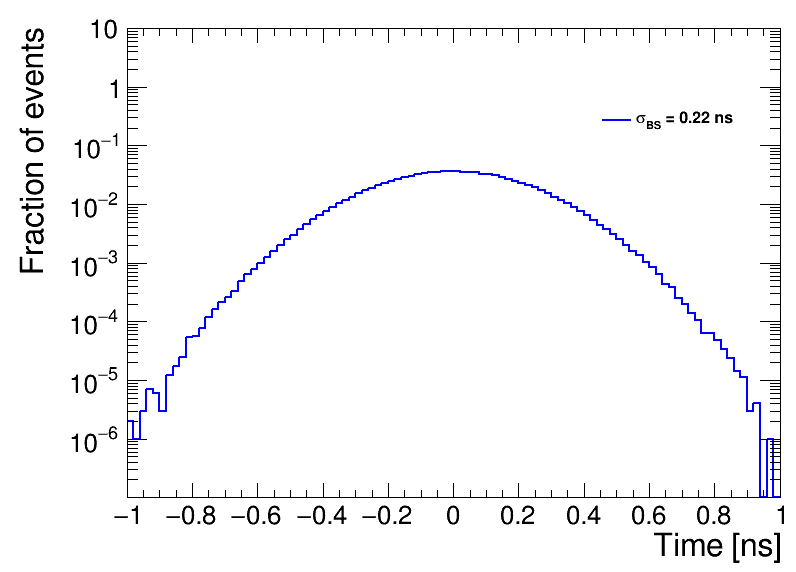

In [28]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.22]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-1,1])
    hs[i].SetLineColor(std_color_list[i+2])
    hs[i].SetMarkerColor(std_color_list[i+2])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime220ps.png')


In [42]:
i = 0
Power_1j = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8,1.0]
# t_cuts = [0.,1.,2.,3.,4.]
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.5,0.6,0.8,1.,2.,3.,4.]
N = 1e6
# print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.random.normal(0,sig,int(N))
    Power_rej_1j = []
    
#     num = len(t_cuts)+j-3
    num = len(t_cuts)
    print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
        if Nsel==0:
            break
#         Nrej = 1.*N - 1.*Nsel
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)
        print('t cut: ',q, 'rej power: ',Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j.append(Power_rej_1j)


    
Power_1j = np.array(Power_1j)
print(Power_1j)


0 0.22 19
t cut:  -5.0 rej power:  1.0
t cut:  -4.0 rej power:  1.0
t cut:  -3.0 rej power:  1.0
t cut:  -2.0 rej power:  1.0
t cut:  -1.0 rej power:  1.000001000001
t cut:  -0.8 rej power:  1.0001140129974817
t cut:  -0.6 rej power:  1.0032273824894686
t cut:  -0.4 rej power:  1.036094421356807
t cut:  -0.2 rej power:  1.2217306792456057
t cut:  0.0 rej power:  1.998281477928981
t cut:  0.2 rej power:  5.484380484380484
t cut:  0.4 rej power:  28.82592026750454
t cut:  0.5 rej power:  85.52125203112973
t cut:  0.6 rej power:  311.81789834736514
t cut:  0.8 rej power:  7407.407407407408
t cut:  1.0 rej power:  142857.14285714287
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000100e+00 1.00011401e+00 1.00322738e+00 1.03609442e+00
  1.22173068e+00 1.99828148e+00 5.48438048e+00 2.88259203e+01
  8.55212520e+01 3.11817898e+02 7.40740741e+03 1.42857143e+05]]


0 0.22


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/RejectionPower_SmearTime220ps.png has been created


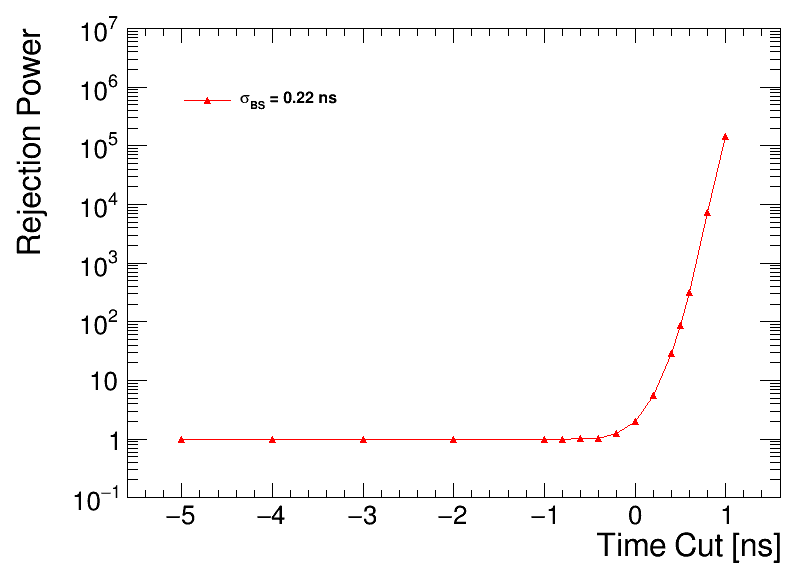

In [43]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-4
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i+1])
    hrej[i].SetMarkerColor(std_color_list[i+1])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
#     if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
    hrej[i].Draw('ALPsame')
#     else:
#         hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime220ps.png')


0 0.22
0 0
1 20
2 30
3 40
4 50
5 60


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/RejectionPower_SmearTime220ps_PLUS.png has been created


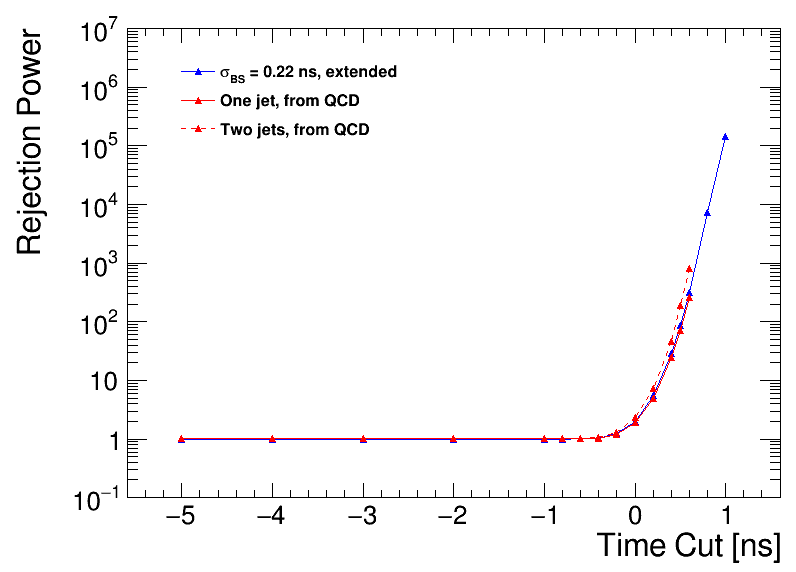

In [44]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg1 = rt.TLegend(0.22,0.75,0.45,0.90);
leg = rt.TLegend(0.45,0.65,0.55,0.92);
leg1.SetTextSize(0.03)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg1.SetBorderSize(0)

rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

hrej1 = {}
hrej2 = {}



# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-4
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i+2])
    hrej[i].SetMarkerColor(std_color_list[i+2])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg1.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns, extended')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
#     if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
    hrej[i].Draw('ALPsame')
#     else:
#         hrej[i].Draw('LPsame')
    
#     i += 1

for npt,pt in enumerate(pt_cuts):
    print(npt,pt)
    

    power1 = Power_1J[npt] 
    power2 = Power_2J[npt] 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
    hrej1[npt] = rt.TGraph(num1 , t_cuts, power1)
    hrej2[npt] = rt.TGraph(num2 , t_cuts, power2)

    hrej1[npt].SetLineColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerStyle(22+npt)
    #     hrej[m].SetMarkerSize(2)

    hrej2[npt].SetLineColor(std_color_list[npt+1])
    hrej2[npt].SetLineStyle(7)
    hrej2[npt].SetMarkerColor(std_color_list[npt+1])
    hrej2[npt].SetMarkerStyle(22+npt)

    hrej1[npt].SetTitle( 'Rejection Power' )
    hrej1[npt].GetXaxis().SetTitle( 'Time Cut [ns]' )
    hrej1[npt].GetYaxis().SetRangeUser(1e-1,1e7)
    hrej1[npt].GetYaxis().SetTitle( 'Rejection Power' )

    if npt==0:
        hrej1[npt].Draw('LPsame')
        hrej2[npt].Draw('LPsame')
        # leg.SetHeader('New Gen Time')
        leg1.AddEntry(hrej1[npt],'One jet, from QCD')
        leg1.AddEntry(hrej2[npt],'Two jets, from QCD')


leg1.Draw()
# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime220ps_PLUS.png')


0 0
1 20
2 30
3 40
4 50
5 60


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190626/RejectionPower_SmearNewTime_Eta1p5_pts.png has been created


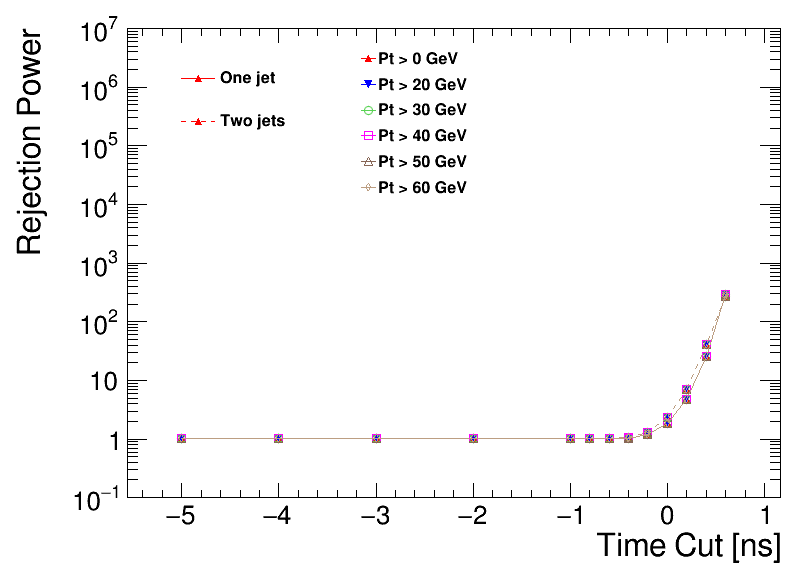

In [28]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg1 = rt.TLegend(0.22,0.75,0.45,0.90);
leg = rt.TLegend(0.45,0.65,0.55,0.92);
leg1.SetTextSize(0.03)
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)

for npt,pt in enumerate(pt_cuts):
    print(npt,pt)
    

    power1 = Power_1J[npt] 
    power2 = Power_2J[npt] 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
    hrej1[npt] = rt.TGraph(num1 , t_cuts, power1)
    hrej2[npt] = rt.TGraph(num2 , t_cuts, power2)

    hrej1[npt].SetLineColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerColor(std_color_list[npt+1])
    hrej1[npt].SetMarkerStyle(22+npt)
    #     hrej[m].SetMarkerSize(2)

    hrej2[npt].SetLineColor(std_color_list[npt+1])
    hrej2[npt].SetLineStyle(7)
    hrej2[npt].SetMarkerColor(std_color_list[npt+1])
    hrej2[npt].SetMarkerStyle(22+npt)

    hrej1[npt].SetTitle( 'Rejection Power' )
    hrej1[npt].GetXaxis().SetTitle( 'Time Cut [ns]' )
    hrej1[npt].GetYaxis().SetRangeUser(1e-1,1e7)
    hrej1[npt].GetYaxis().SetTitle( 'Rejection Power' )

    if npt==0:
        hrej1[npt].Draw('ALPsame')
        hrej2[npt].Draw('LPsame')
        # leg.SetHeader('New Gen Time')
        leg1.AddEntry(hrej1[npt],'One jet')
        leg1.AddEntry(hrej2[npt],'Two jets')
        leg.AddEntry(hrej1[npt],'Pt > '+str(pt)+' GeV')
    else:
        hrej1[npt].Draw('LPsame')
        hrej2[npt].Draw('LPsame')
        leg.AddEntry(hrej1[npt],'Pt > '+str(pt)+' GeV')




leg.SetBorderSize(0)
leg1.SetBorderSize(0)
leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearNewTime_Eta1p5_pts.png')


# Others

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_subleading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_subleading.pdf has been created


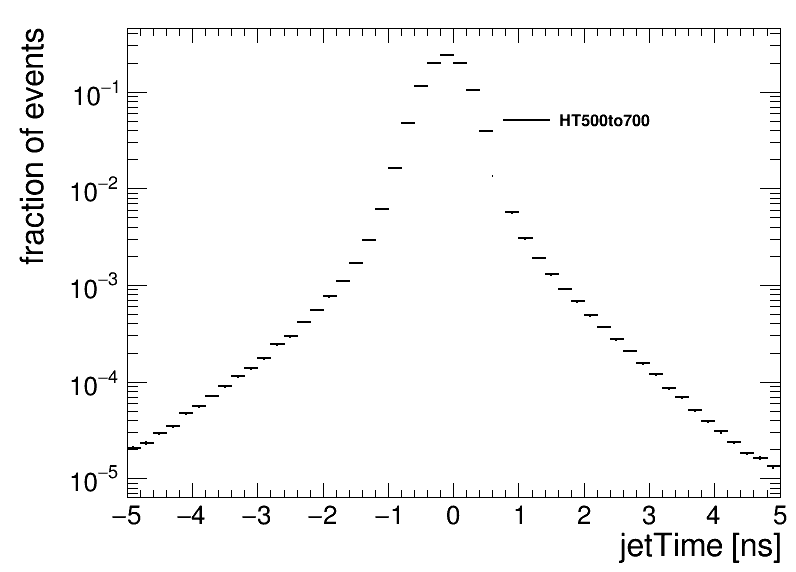

In [13]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

# jetTime = tree['jetTime'].array()
# weight = tree['weight'].array()
t = jetTime[:,1]
ht1 = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5],weights = weight)
ht1.SetLineColor(std_color_list[i])
ht1.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht1,HT)
leg.SetBorderSize(0)

ht1.DrawNormalized('')
  
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_subleading.png')
c.SaveAs(out_dir+'JetTime_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all.pdf has been created


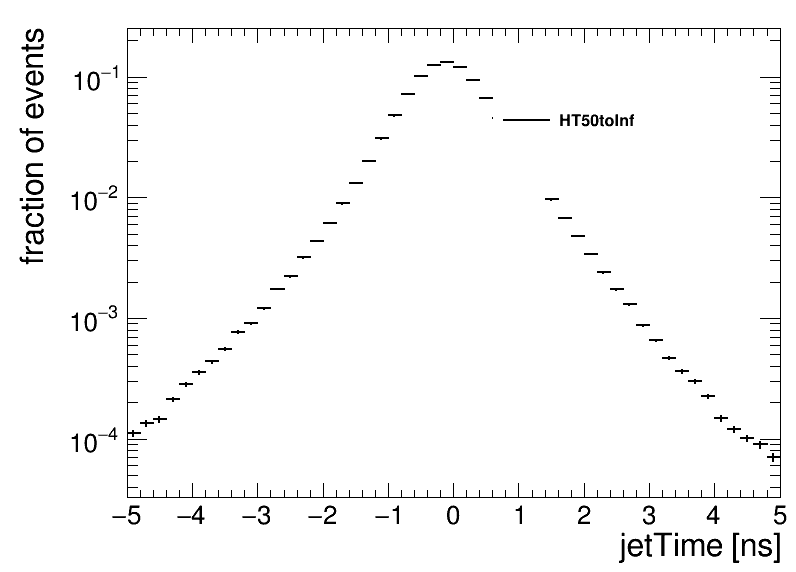

In [7]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all.png')
c.SaveAs(out_dir+'JetTime_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_subleading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_subleading.pdf has been created


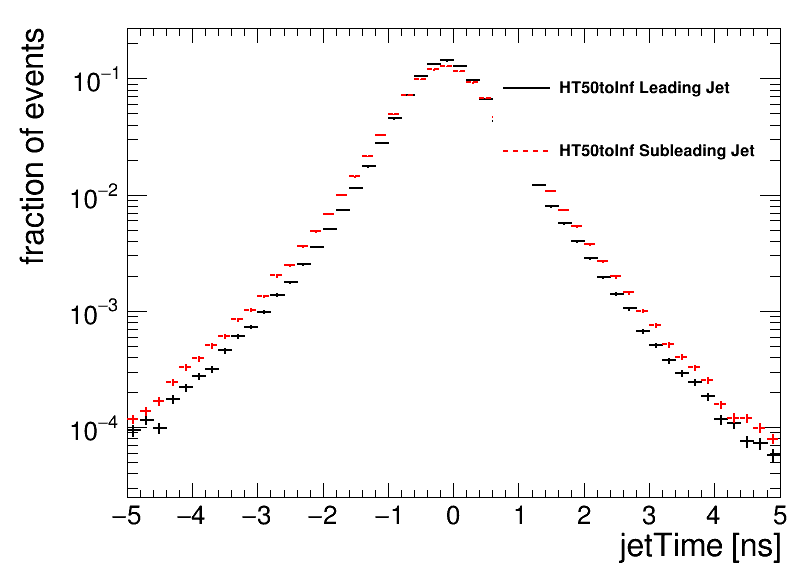

In [8]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

 
ht0.SetLineStyle(1)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])

ht1.SetLineStyle(7)
ht1.SetLineColor(std_color_list[i+1])
ht1.SetMarkerColor(std_color_list[i+1])


leg.AddEntry(ht0,HT+' Leading Jet')
leg.AddEntry(ht1,HT+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
ht0.DrawNormalized('')
ht1.DrawNormalized('same')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading_subleading.png')
c.SaveAs(out_dir+'JetTime_leading_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_subleading_all.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_subleading_all.pdf has been created


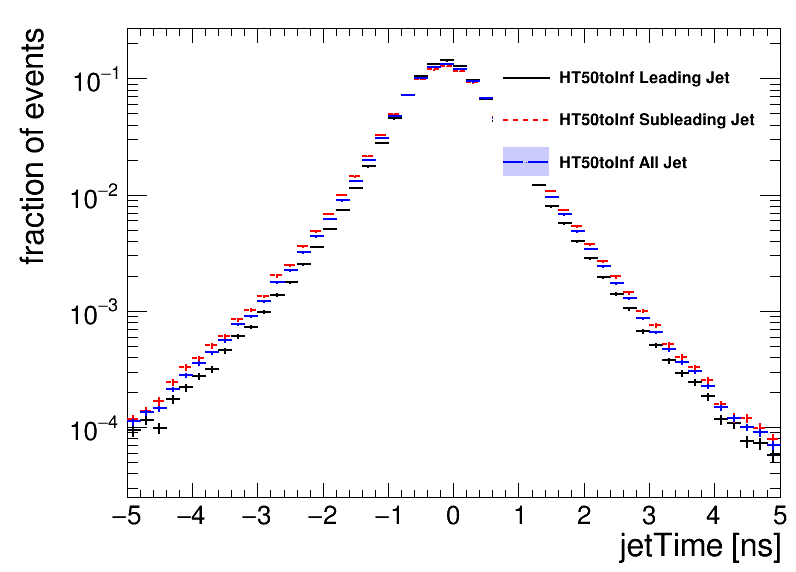

In [9]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0




ht0.SetLineStyle(1)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])

ht1.SetLineStyle(7)
ht1.SetLineColor(std_color_list[i+1])
ht1.SetMarkerColor(std_color_list[i+1])

ht.SetLineStyle(9)
ht.SetLineColor(std_color_list[i+2])
ht.SetFillColorAlpha(std_color_list[i+2],0.2)
ht.SetMarkerColor(std_color_list[i+2])


leg.AddEntry(ht0,HT+' Leading Jet')
leg.AddEntry(ht1,HT+' Subleading Jet')
leg.AddEntry(ht,HT+' All Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
ht0.DrawNormalized('')
ht1.DrawNormalized('same')
ht.DrawNormalized('same')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading_subleading_all.png')
c.SaveAs(out_dir+'JetTime_leading_subleading_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading.pdf has been created


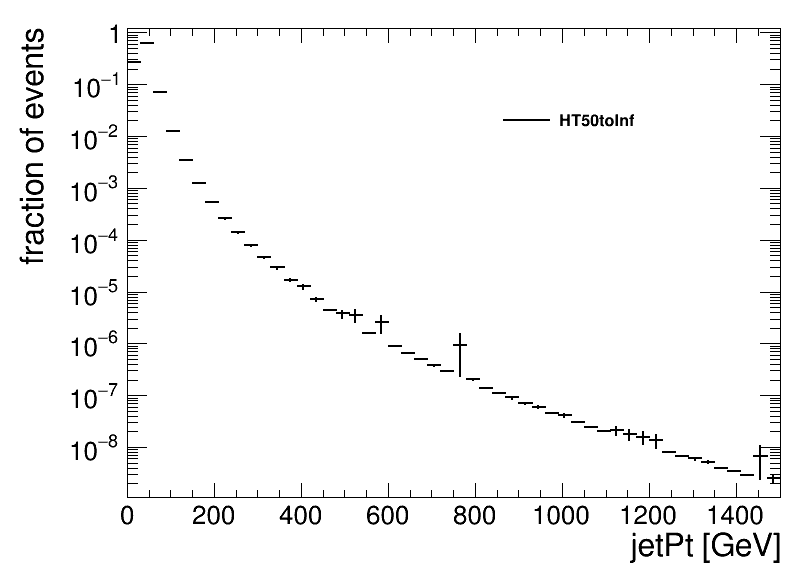

In [10]:
# plot leading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt[:,0]
h0 = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights = weight)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])


leg.AddEntry(h0,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading.png')
c.SaveAs(out_dir+'JetPt_leading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_subleading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetPt_subleading.pdf has been created


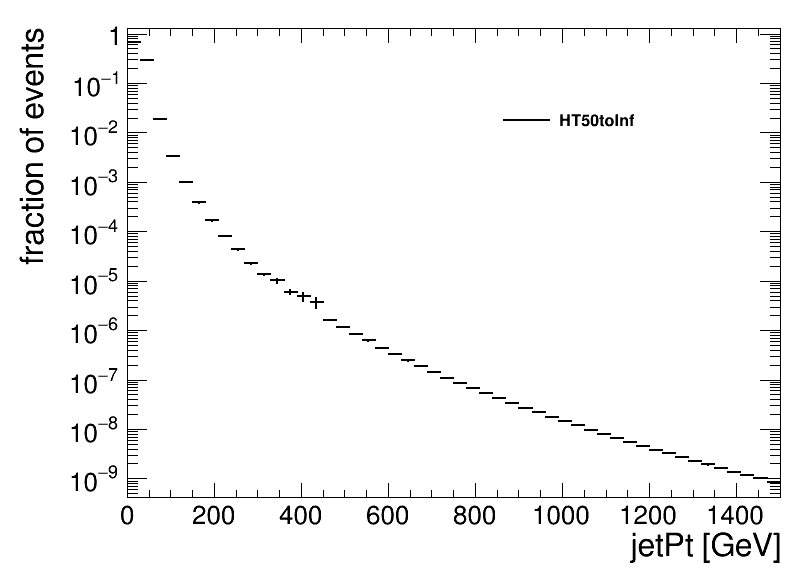

In [11]:
# plot subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


 
jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt[:,1]
h1 = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights =weight)
h1.SetLineColor(std_color_list[i])
h1.SetMarkerColor(std_color_list[i])


leg.AddEntry(h1,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h1.DrawNormalized('')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_subleading.png')
c.SaveAs(out_dir+'JetPt_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading.pdf has been created


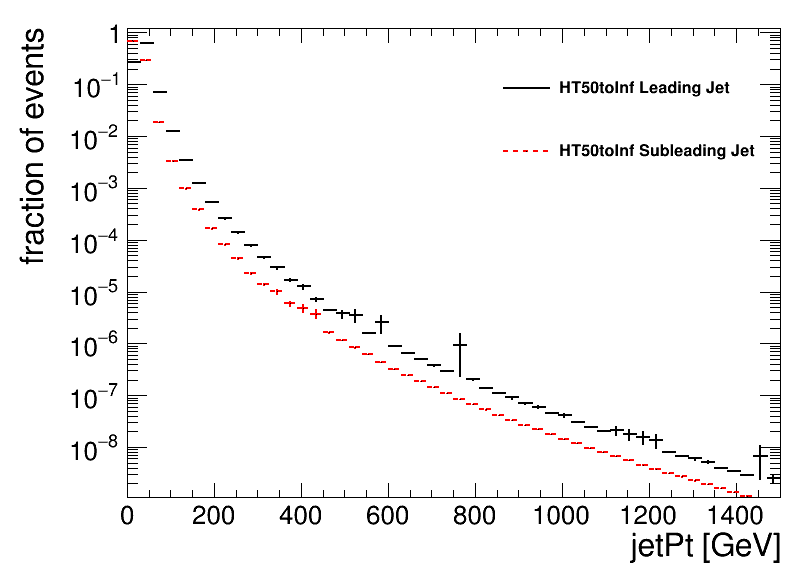

In [12]:
# plot leading n subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')
h1.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading.png')
c.SaveAs(out_dir+'JetPt_leading_subleading.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_all.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetPt_all.pdf has been created


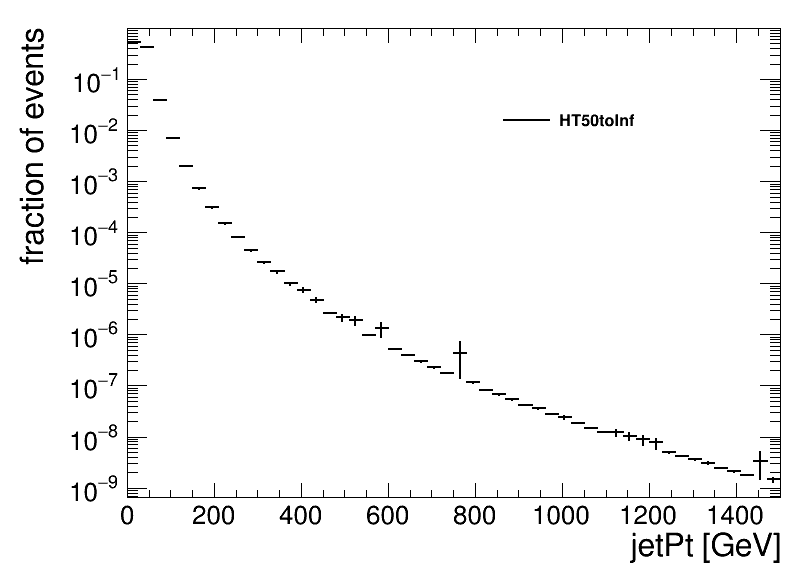

In [13]:
 # plot subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
hpt = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
pt = jetPt.flatten()
hpt = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=HT, binning=[50,0,1500], weights = flat_weight)
hpt.SetLineColor(std_color_list[i])
hpt.SetMarkerColor(std_color_list[i])


leg.AddEntry(hpt,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)

hpt.DrawNormalized('')

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_all.png')
c.SaveAs(out_dir+'JetPt_all.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading_all.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading_all.pdf has been created


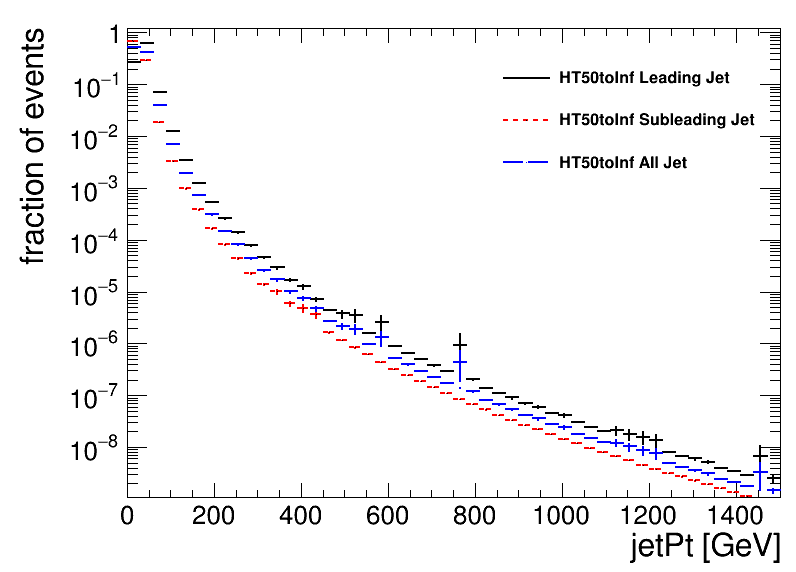

In [14]:
# plot leading n subleading n all jet pt
 
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])

hpt.SetLineStyle(9)
hpt.SetLineColor(std_color_list[i+2])
hpt.SetMarkerColor(std_color_list[2])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.DrawNormalized('')
h1.DrawNormalized('same')
hpt.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
leg.AddEntry(hpt,HT+' All Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading_all.png')
c.SaveAs(out_dir+'JetPt_leading_subleading_all.pdf') 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading_all_small.png has been created
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetPt_leading_subleading_all_small.png has been created


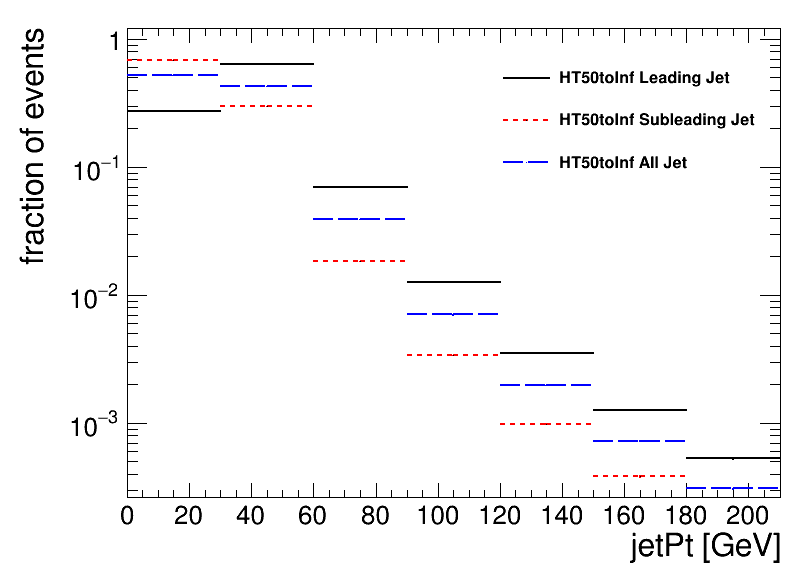

In [15]:

# plot leading n subleading n all jet pt
 
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


h0.SetLineStyle(1)
h0.SetLineColor(std_color_list[i])
h0.SetMarkerColor(std_color_list[i])

h1.SetLineStyle(7)
h1.SetLineColor(std_color_list[i+1])
h1.SetMarkerColor(std_color_list[i])

hpt.SetLineStyle(9)
hpt.SetLineColor(std_color_list[i+2])
hpt.SetMarkerColor(std_color_list[2])


#leg.AddEntry(h0[k],k+' Leading Jet')
#leg.AddEntry(h1[k],k+' Subleading Jet')
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
h0.GetXaxis().SetRangeUser(0,200)
h0.DrawNormalized('')
h1.DrawNormalized('same')
hpt.DrawNormalized('same')
leg.AddEntry(h0,HT+' Leading Jet')
leg.AddEntry(h1,HT+' Subleading Jet')
leg.AddEntry(hpt,HT+' All Jet')
 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetPt_leading_subleading_all_small.png')
c.SaveAs(out_dir+'JetPt_leading_subleading_all_small.png')
 

 

In [14]:
 # plot jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


#pt ranges
pt_range = [[40,60],[60,80],[80,100]]
#time cuts


jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
#print len(jetTime)
t = jetTime.flatten()
pt = jetPt.flatten()
#test cut
#cut = 'pt>20'
cutted_t = t[pt>20]
cut_weight = flat_weight[pt>20]
print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
#cutted_t = np.logical_and(pt>-20, t>-1)
#count = np.count_nonzero(cutted_met) 
#print count
#print len(t)

(2220768,) (2220767,) (55945,)


/home/maojiajing/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


pt in [80, 100] GeV
[1.000168227641395, 1.0003418262890034, 1.000863330159337, 1.0028242197218686, 1.0236664500514827, 1.051373493706813, 1.122688335533793, 1.2959380933247673, 1.692596255245036, 2.6011080487045644, 4.76425025876004, 9.910434670385051, 21.058864218714692, 41.19613321554956, 71.6158829812176, 429.5431165138045, 1649.1909775338193, 5019.388168705495, 11278.436512820514]
pt in [60, 80] GeV
[1.000209865354096, 1.000432639372663, 1.0011556185967072, 1.0041572241465386, 1.0364790742632366, 1.0725382920304252, 1.1541838472937407, 1.3338355020865635, 1.7144004798559882, 2.5184434726155285, 4.23496201569566, 7.8187423093208155, 14.7473477430699, 26.65134895217311, 44.95899387962072, 297.63658758869906, 1230.2184991446243, 3798.8237415553413, 8946.936595286517]
1
pt in [40, 60] GeV
[1.0003300040349656, 1.0007231517360264, 1.0020604454654274, 1.0079830443608022, 1.062136573046816, 1.110030496315752, 1.2042748426136332, 1.389085166009526, 1.7438720704393174, 2.4185315157955563, 3.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_PtBins.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_PtBins.pdf has been created


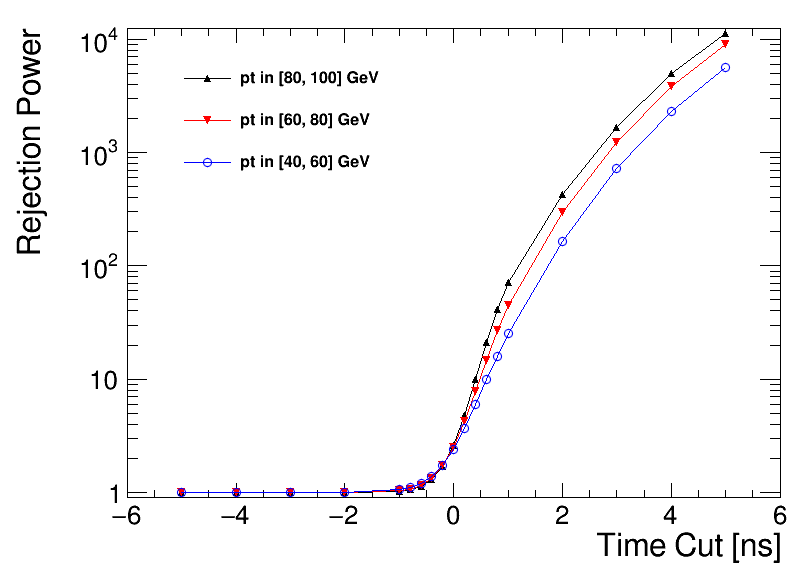

In [17]:
 # plot jet time
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
#weight_v = weight[np.logical_not(np.isnan(jetTime))]
# print 'Time',jetTime_v[:3]
# print 'Pt',jetPt_v[:3]
#print 'Weight',weight_v[:3]

flat_weight_v = []
sizes = [len(x) for x in jetTime_v]
for j, (n, val) in enumerate(zip(sizes, weight)):
#         print j, n
#         print val
#         print n*[val]
        flat_weight_v += n*[val]
#         print flat_weight_v
#         if j>4 : 
#             break
flat_weight_v = np.array(flat_weight_v)

t_v = jetTime_v.flatten()
pt_v = jetPt_v.flatten()
#print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
#print 'Inclusive',t.shape, pt.shape, flat_weight.shape


#test cut
#cut = 'pt>20'
#cutted_t = t[pt>40]
#cut_weight = flat_weight[pt>20]
#print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
Power_rej = {}
    
for m,n in enumerate(pt_range):
    #print m,n, n[0], n[1]
    ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
    ptcutted_t_v = t_v[ptcut_string]
    #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
    #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
    Ntotal = ptcutted_t_v.shape[0]
    #print Ntotal
    Power_rej[m] = []
    for p, q in enumerate(t_cuts):
        #print p, q
        tcut_string = np.logical_and(ptcut_string,t_v > q)
        #ptcutted_t_v = ptcutted_t_v.flatten()
        cutted_t_v =  t_v[tcut_string]
        #cutted_t_v = cutted_t_v.flatten()
        Nsel = cutted_t_v.shape[0]
        Nrej = 1.*Ntotal - 1.*Nsel
        Prej = 1.0*Ntotal/Nsel
        #Prej = Ntotal/Nrej
        #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
        Power_rej[m] += [Prej]
        #print Power_rej[m]
        #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
    #Power_rej[m] = np.array(Power_rej[m]) 
    #print 'Rejection power',Power_rej[m]
    #print Power_rej[m].shape
        

#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}

for m,n in enumerate(pt_range):
#     if i==1 :

    pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
    name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
    print(pt_string)
    power = Power_rej[m]
    print(power)
    num = len(Power_rej[m])
    #print num, t_cuts, power
    t_cuts = np.array(t_cuts) 
    power = np.array(Power_rej[m]) 
    #print num, t_cuts, power
    hrej[m] = rt.TGraph(num , t_cuts, power)

    #print num, t_cuts, power
    hrej[m].SetLineColor(std_color_list[i])
    hrej[m].SetMarkerColor(std_color_list[i])
    hrej[m].SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


    leg.AddEntry(hrej[m],pt_string)
    leg.SetBorderSize(0)
        #hrej[m].GetYaxis().SetRangeUser(0,1000)

    if i==0 :
        #hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej[m].SetTitle( 'Rejection Power' )
        hrej[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej[m].GetYaxis().SetTitle( 'Rejection Power' )
        hrej[m].Draw('APL')
    else:
        print(i)
        hrej[m].Draw('PLsame')
        
    i+=1

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_PtBins.png')
c.SaveAs(out_dir+'RejectionPower_PtBins.pdf')


[4.2758566e-06 1.0127239e-05 1.1433644e-04 1.9260001e-04 5.0959305e-04
 6.3736360e-03 3.2338642e-02 3.6736554e-01 5.9467010e+01]
unique weights after pt cut [4.2758566e-06 1.0127239e-05 1.1433644e-04 1.9260001e-04 5.0959305e-04
 6.3736360e-03 3.2338642e-02 3.6736554e-01 5.9467010e+01]
54982378 1385650.6
[1.000168227641395, 1.0003418262890034, 1.000863330159337, 1.0028242197218686, 1.0236664500514827, 1.051373493706813, 1.122688335533793, 1.2959380933247673, 1.692596255245036, 2.6011080487045644, 4.76425025876004, 9.910434670385051, 21.058864218714692, 41.19613321554956, 71.6158829812176, 429.5431165138045, 1649.1909775338193, 5019.388168705495, 11278.436512820514]
[1.0001533810829697, 1.0003217935541846, 1.0008142694606248, 1.003073320000894, 1.025276363983119, 1.0533237045712074, 1.125040481932651, 1.302240952529643, 1.70694715413979, 2.6264439991958515, 4.811080688273452, 9.87341487471249, 20.204596232805592, 38.68697913633396, 65.84354965753059, 394.5742703056846, 1541.5040829403554

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_w_PtBins.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_w_PtBins.pdf has been created


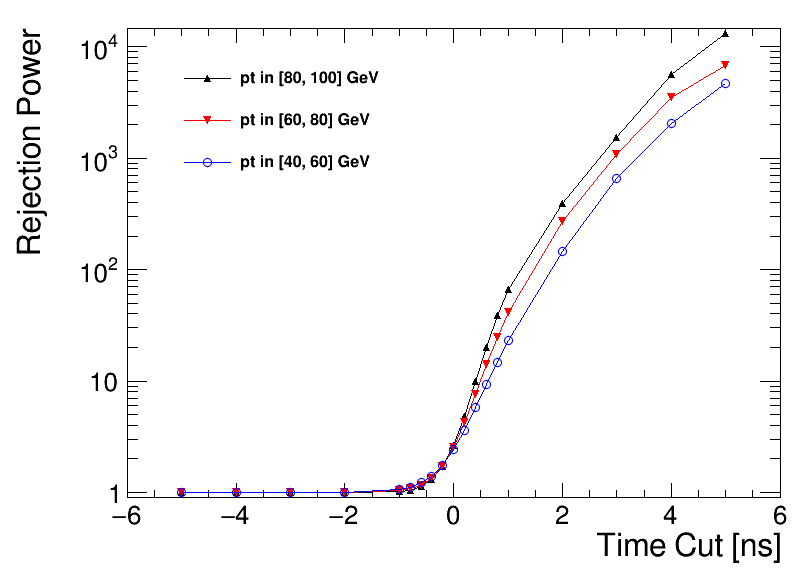

In [19]:
 # plot jet time rejection power w/ weight
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()
print(np.unique(weight))
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
#weight_v = weight[np.logical_not(np.isnan(jetTime))]
# print 'Time',jetTime_v[:3]
# print 'Pt',jetPt_v[:3]
#print 'Weight',weight_v[:3]

flat_weight_v = []
sizes = [len(x) for x in jetTime_v]
for j, (n, val) in enumerate(zip(sizes, weight)):
#         print j, n
#         print val
#         print n*[val]
        flat_weight_v += n*[val]
#         print flat_weight_v
#         if j>4 : 
#             break
flat_weight_v = np.array(flat_weight_v)

t_v = jetTime_v.flatten()
pt_v = jetPt_v.flatten()
#print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
#print 'Inclusive',t.shape, pt.shape, flat_weight.shape


#test cut
#cut = 'pt>20'
#cutted_t = t[pt>40]
#cut_weight = flat_weight[pt>20]
#print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
Power_rej = {}
Power_rej_w = {}
    
for m,n in enumerate(pt_range):
    #print m,n, n[0], n[1]
    ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
    ptcutted_t_v = t_v[ptcut_string]
    ptcutted_w_v = flat_weight_v[ptcut_string]
    #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
    #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
    Ntotal = ptcutted_t_v.shape[0]
    #Ntotal_w = ptcutted_w_v.shape[0]
    print ('unique weights after pt cut',np.unique(ptcutted_w_v))
    Ntotal_w = np.sum(ptcutted_w_v)
    print(Ntotal, Ntotal_w)
    Power_rej[m] = []
    Power_rej_w[m] = []
    for p, q in enumerate(t_cuts):
        #print p, q
        tcut_string = np.logical_and(ptcut_string,t_v > q)
        #ptcutted_t_v = ptcutted_t_v.flatten()
        cutted_t_v =  t_v[tcut_string]
        cutted_w_v =  flat_weight_v[tcut_string]
        #cutted_t_v = cutted_t_v.flatten()
        Nsel = cutted_t_v.shape[0]
        Nsel_w = np.sum(cutted_w_v)
        Nrej = 1.*Ntotal - 1.*Nsel
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej = 1.0*Ntotal/Nsel
        Prej_w = 1.0*Ntotal_w/Nsel_w
        #Prej = Ntotal/Nrej
        #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
        Power_rej[m] += [Prej]
        Power_rej_w[m] += [Prej_w]
        #print Power_rej[m]
        #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
    #Power_rej[m] = np.array(Power_rej[m]) 
    #print 'Rejection power',Power_rej[m]
    #print Power_rej[m].shape
    print(Power_rej[m])
    print(Power_rej_w[m])
        

#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej_w = {}

for m,n in enumerate(pt_range):
#     if i==1 :

    pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
    name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
    print(pt_string)
    power = Power_rej_w[m]
    #power = Power_rej[m]
    print(power)
    num = len(Power_rej_w[m])
    #print num, t_cuts, power
    t_cuts = np.array(t_cuts) 
    power = np.array(Power_rej_w[m]) 
    #print num, t_cuts, power
    hrej_w[m] = rt.TGraph(num , t_cuts, power)

    #print num, t_cuts, power
    hrej_w[m].SetLineColor(std_color_list[i])
    hrej_w[m].SetMarkerColor(std_color_list[i])
    hrej_w[m].SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


    leg.AddEntry(hrej_w[m],pt_string)
    leg.SetBorderSize(0)
        #hrej[m].GetYaxis().SetRangeUser(0,1000)

    if i==0 :
        #hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej_w[m].SetTitle( 'Rejection Power' )
        hrej_w[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        hrej_w[m].GetYaxis().SetRangeUser(0,10000)
        hrej_w[m].GetYaxis().SetTitle( 'Rejection Power' )
        hrej_w[m].Draw('ALP')
    else:
        print(i)
        hrej_w[m].Draw('LPsame')
        
    i+=1

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_w_PtBins.png')
c.SaveAs(out_dir+'RejectionPower_w_PtBins.pdf')


unique weights after pt cut [4.2758566e-06 1.0127239e-05 1.1433644e-04 1.9260001e-04 5.0959305e-04
 6.3736360e-03 3.2338642e-02 3.6736554e-01 5.9467010e+01]
54982378 1385650.6 1897079.6
[1.000168227641395, 1.0003418262890034, 1.000863330159337, 1.0028242197218686, 1.0236664500514827, 1.051373493706813, 1.122688335533793, 1.2959380933247673, 1.692596255245036, 2.6011080487045644, 4.76425025876004, 9.910434670385051, 21.058864218714692, 41.19613321554956, 71.6158829812176, 429.5431165138045, 1649.1909775338193, 5019.388168705495, 11278.436512820514]
[1.0001533810829697, 1.0003217935541846, 1.0008142694606248, 1.003073320000894, 1.025276363983119, 1.0533237045712074, 1.125040481932651, 1.302240952529643, 1.70694715413979, 2.6264439991958515, 4.811080688273452, 9.87341487471249, 20.204596232805592, 38.68697913633396, 65.84354965753059, 394.5742703056846, 1541.5040829403554, 5612.905997576456, 13220.772986470873]
[1.3692994228811193, 1.3695299946154174, 1.3702042381736819, 1.373297080391243

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_w_PtBins_keepInvalidTime.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_w_PtBins_keepInvalidTime.pdf has been created


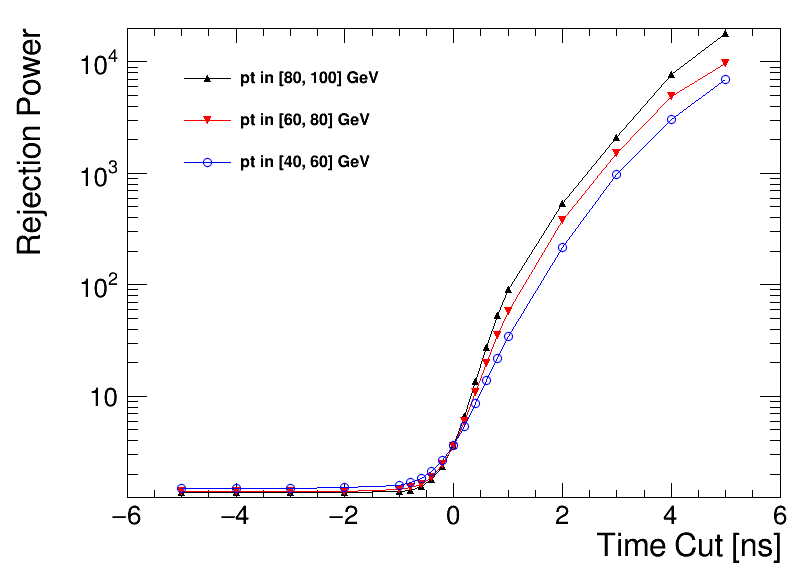

In [21]:
 # plot jet time rejection power w/ weight
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()
# print np.unique(weight)
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
#weight_v = weight[np.logical_not(np.isnan(jetTime))]
# print 'Time',jetTime_v[:3]
# print 'Pt',jetPt_v[:3]
#print 'Weight',weight_v[:3]

flat_weight_v = []
sizes = [len(x) for x in jetTime_v]
for j, (n, val) in enumerate(zip(sizes, weight)):
#         print j, n
#         print val
#         print n*[val]
        flat_weight_v += n*[val]
#         print flat_weight_v
#         if j>4 : 
#             break
flat_weight_v = np.array(flat_weight_v)

t_v = jetTime_v.flatten()
pt_v = jetPt_v.flatten()
pt = jetPt.flatten()
#print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
#print 'Inclusive',t.shape, pt.shape, flat_weight.shape


#test cut
#cut = 'pt>20'
#cutted_t = t[pt>40]
#cut_weight = flat_weight[pt>20]
#print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
Power_rej = {}
Power_rej_w = {}
Power_rej_k = {}
    
for m,n in enumerate(pt_range):
    #print m,n, n[0], n[1]
    ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
    ptcut_string_k = np.logical_and( pt > n[0], pt < n[1])
    ptcutted_t_v = t_v[ptcut_string]
    ptcutted_w_v = flat_weight_v[ptcut_string]
    ptcutted_w_k = flat_weight[ptcut_string_k]
    #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
    #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
    Ntotal = ptcutted_t_v.shape[0]
    #Ntotal_w = ptcutted_w_v.shape[0]
    print('unique weights after pt cut',np.unique(ptcutted_w_v))
    Ntotal_w = np.sum(ptcutted_w_v)
    Ntotal_w_k = np.sum(ptcutted_w_k)
    print(Ntotal, Ntotal_w, Ntotal_w_k)
    Power_rej[m] = []
    Power_rej_w[m] = []
    Power_rej_k[m] = []
    for p, q in enumerate(t_cuts):
        #print p, q
        tcut_string = np.logical_and(ptcut_string,t_v > q)
        #ptcutted_t_v = ptcutted_t_v.flatten()
        cutted_t_v =  t_v[tcut_string]
        cutted_w_v =  flat_weight_v[tcut_string]
        #cutted_t_v = cutted_t_v.flatten()
        Nsel = cutted_t_v.shape[0]
        Nsel_w = np.sum(cutted_w_v)
        Nrej = 1.*Ntotal - 1.*Nsel
        Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
        Prej = 1.0*Ntotal/Nsel
        Prej_w = 1.0*Ntotal_w/Nsel_w
        Prej_k = 1.0*Ntotal_w_k/Nsel_w
        #Prej = Ntotal/Nrej
        #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
        Power_rej[m] += [Prej]
        Power_rej_w[m] += [Prej_w]
        Power_rej_k[m] += [Prej_k]
        #print Power_rej[m]
        #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
    #Power_rej[m] = np.array(Power_rej[m]) 
    #print 'Rejection power',Power_rej[m]
    #print Power_rej[m].shape
    print(Power_rej[m])
    print(Power_rej_w[m])
    print(Power_rej_k[m])
        

#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej_k = {}

for m,n in enumerate(pt_range):
#     if i==1 :

    pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
    name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
    print(pt_string)
    power = Power_rej_k[m]
    #power = Power_rej[m]
    print(power)
    num = len(Power_rej_k[m])
    #print num, t_cuts, power
    t_cuts = np.array(t_cuts) 
    power = np.array(Power_rej_k[m]) 
    #print num, t_cuts, power
    hrej_k[m] = rt.TGraph(num , t_cuts, power)

    #print num, t_cuts, power
    hrej_k[m].SetLineColor(std_color_list[i])
    hrej_k[m].SetMarkerColor(std_color_list[i])
    hrej_k[m].SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


    leg.AddEntry(hrej_k[m],pt_string)
    leg.SetBorderSize(0)
        #hrej[m].GetYaxis().SetRangeUser(0,1000)

    if i==0 :
        #hrej[m].GetYaxis().SetRangeUser(0,1000)
        hrej_k[m].SetTitle( 'Rejection Power' )
        hrej_k[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        hrej_k[m].GetYaxis().SetRangeUser(0,10000)
        hrej_k[m].GetYaxis().SetTitle( 'Rejection Power' )
        hrej_k[m].Draw('ALP')
    else:
        print(i)
        hrej_k[m].Draw('LPsame')
        
    i+=1

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_w_PtBins_keepInvalidTime.png')
c.SaveAs(out_dir+'RejectionPower_w_PtBins_keepInvalidTime.pdf')


In [4]:
# plot jet time rejection power w/ weight
#pt ranges
#pt_range = [[60,80],[80,100]]
pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
jetPt = tree['jetPt'].array()
weight = tree['weight'].array()

NameError: name 'tree' is not defined

In [1]:
sizes = [len(x) for x in jetTime]
for i, (n, time, pt) in enumerate(zip(sizes,jetTime,jetPt)):
    print(i,n,time,pt)
#     for j in enumerate(time):
    for j in range(n):
        print(time[j])
    if i>4:
        break

NameError: name 'jetTime' is not defined

In [3]:
def sort_lists(list1, list2): 
    for index, (ele1,ele2) in enumerate(zip(list1,list2)): 
        print(index,ele1,ele2)
        list3.append(ele1,ele2)
    return list3 

for i, (time, pt) in enumerate(zip(jetTime,jetPt)):
#     print(i,time,pt,len(time),len(pt))
    time_s =[]
    pt_s= []
    for j in range(len(pt)):
#         print(j,pt[j])
        time_s.append(time[j])
        pt_s.append(pt[j])
    print(i,time_s)
    print(i,pt_s)
    pairlist = sort_lists(time_s,pt_s)
    print(pairlist)
    if i>4:
        break

NameError: name 'jetTime' is not defined

In [48]:
# # plot jet time rejection power w/ weight
# #pt ranges
# #pt_range = [[60,80],[80,100]]
# pt_range = [[80,100],[60,80],[40,60]]
# #time cuts
# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
# #print len(t_cuts)

# jetTime = tree['jetTime'].array()
# jetPt = tree['jetPt'].array()
# weight = tree['weight'].array()

time_cut_w = []
Ntotal = np.sum(weight)
print(Ntotal)

for index, (time,pt,w) in enumerate(zip(jetTime,jetPt,weight)):
#     print(time)
    p = np.logical_and(np.any(time>1),weight)
#     print(np.any(p))
    if np.any(p):
        time_cut_w.append(weight)
#     if index>4:
#         break

print(len(time_cut_w))

86570730.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


KeyboardInterrupt: 

In [13]:
# print np.unique(weight)
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

# jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
# jetPt_v = jetPt[np.logical_not(np.isnan(jetTime))]
# #weight_v = weight[np.logical_not(np.isnan(jetTime))]
# # print 'Time',jetTime_v[:3]
# # print 'Pt',jetPt_v[:3]
# #print 'Weight',weight_v[:3]

# flat_weight_v = []
# sizes = [len(x) for x in jetTime_v]
# for j, (n, val) in enumerate(zip(sizes, weight)):
# #         print j, n
# #         print val
# #         print n*[val]
#         flat_weight_v += n*[val]
# #         print flat_weight_v
# #         if j>4 : 
# #             break
# flat_weight_v = np.array(flat_weight_v)

# t_v = jetTime_v.flatten()
# pt_v = jetPt_v.flatten()
# pt = jetPt.flatten()
# #print 'Valid ones',t_v.shape, pt_v.shape, flat_weight_v.shape
# #print 'Inclusive',t.shape, pt.shape, flat_weight.shape


# #test cut
# #cut = 'pt>20'
# #cutted_t = t[pt>40]
# #cut_weight = flat_weight[pt>20]
# #print t.shape, cutted_t.shape, cutted_t[cutted_t>1].shape
 
# Power_rej = {}
# Power_rej_e = {}
# Power_rej_w = {}
# Power_rej_k = {}
    
# for m,n in enumerate(pt_range):
#     #print m,n, n[0], n[1]
#     ptcut_string = np.logical_and( pt_v > n[0], pt_v < n[1])
#     ptcut_string_k = np.logical_and( pt > n[0], pt < n[1])
#     ptcutted_t_v = t_v[ptcut_string]
#     ptcutted_w_v = flat_weight_v[ptcut_string]
#     ptcutted_w_k = flat_weight[ptcut_string_k]
#     #print t_v.shape, t_v[np.logical_and(pt_v>n[0],pt_v<n[1])].shape, ptcutted_t_v.shape 
#     #print 'pt range = [',n[0],',',n[1],'] GeV, after pt cut ',ptcutted_t_v.shape
#     Ntotal = ptcutted_t_v.shape[0]
#     #Ntotal_w = ptcutted_w_v.shape[0]
#     print('unique weights after pt cut',np.unique(ptcutted_w_v))
#     Ntotal_w = np.sum(ptcutted_w_v)
#     Ntotal_w_k = np.sum(ptcutted_w_k)
#     print(Ntotal, Ntotal_w, Ntotal_w_k)
#     Power_rej[m] = []
#     Power_rej_w[m] = []
#     Power_rej_k[m] = []
#     for p, q in enumerate(t_cuts):
#         #print p, q
#         tcut_string = np.logical_and(ptcut_string,t_v > q)
#         #ptcutted_t_v = ptcutted_t_v.flatten()
#         cutted_t_v =  t_v[tcut_string]
#         cutted_w_v =  flat_weight_v[tcut_string]
#         #cutted_t_v = cutted_t_v.flatten()
#         Nsel = cutted_t_v.shape[0]
#         Nsel_w = np.sum(cutted_w_v)
#         Nrej = 1.*Ntotal - 1.*Nsel
#         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
#         Prej = 1.0*Ntotal/Nsel
#         Prej_w = 1.0*Ntotal_w/Nsel_w
#         Prej_k = 1.0*Ntotal_w_k/Nsel_w
#         #Prej = Ntotal/Nrej
#         #print 'after time cut > ',q,' ns ',cutted_t_v.shape, ', rejection power = ', Prej
#         Power_rej[m] += [Prej]
#         Power_rej_w[m] += [Prej_w]
#         Power_rej_k[m] += [Prej_k]
#         #print Power_rej[m]
#         #, t_v[np.logical_and(np.logical_and( pt_v > n[0], pt_v < n[1]),t_cuts > q)].shape
#     #Power_rej[m] = np.array(Power_rej[m]) 
#     #print 'Rejection power',Power_rej[m]
#     #print Power_rej[m].shape
#     print(Power_rej[m])
#     print(Power_rej_w[m])
#     print(Power_rej_k[m])
        

# #make plot
# c = rt.TCanvas('c','c', 800, 600)
# leg = rt.TLegend(0.22,0.68,0.55,0.90);
# leg.SetTextSize(0.03)
# rt.gStyle.SetOptStat(0000)
# i = 0

# hrej_k = {}

# for m,n in enumerate(pt_range):
# #     if i==1 :

#     pt_string = 'pt in [' + str(n[0]) + ', ' + str(n[1]) + '] GeV'
#     name_string = 'pt_' + str(n[0]) + '_' + str(n[1])  
#     print(pt_string)
#     power = Power_rej_k[m]
#     #power = Power_rej[m]
#     print(power)
#     num = len(Power_rej_k[m])
#     #print num, t_cuts, power
#     t_cuts = np.array(t_cuts) 
#     power = np.array(Power_rej_k[m]) 
#     #print num, t_cuts, power
#     hrej_k[m] = rt.TGraph(num , t_cuts, power)

#     #print num, t_cuts, power
#     hrej_k[m].SetLineColor(std_color_list[i])
#     hrej_k[m].SetMarkerColor(std_color_list[i])
#     hrej_k[m].SetMarkerStyle(22+i)
# #     hrej[m].SetMarkerSize(2)


#     leg.AddEntry(hrej_k[m],pt_string)
#     leg.SetBorderSize(0)
#         #hrej[m].GetYaxis().SetRangeUser(0,1000)

#     if i==0 :
#         #hrej[m].GetYaxis().SetRangeUser(0,1000)
#         hrej_k[m].SetTitle( 'Rejection Power' )
#         hrej_k[m].GetXaxis().SetTitle( 'Time Cut [ns]' )
#         #hrej[m].GetXaxis().SetRangeUser(-10,10)
#         hrej_k[m].GetYaxis().SetRangeUser(0,10000)
#         hrej_k[m].GetYaxis().SetTitle( 'Rejection Power' )
#         hrej_k[m].Draw('ALP')
#     else:
#         print(i)
#         hrej_k[m].Draw('LPsame')
        
#     i+=1

# leg.Draw()
# c.SetLogy()
# c.Draw()
# c.SaveAs(out_dir+'RejectionPower_w_PtBins_PerEvent.png')
# c.SaveAs(out_dir+'RejectionPower_w_PtBins_PerEvent.pdf')

NameError: name 'lex' is not defined

In [11]:
a = [-100,1,0,10,np.nan,-np.nan]
b = np.where(np.isnan(a), 0, a)
b.sort()
print(b)

[-100.    0.    0.    0.    1.   10.]


In [3]:
# root_file = rt.TFile.Open(fpath)
# print('Open ready')

# tree = rtnp.root2array(fpath)
# print('Tree ready')
# # tree_a = rtnp.tree2array(tree)

# # a = tree_a["jetPt"]
    

NameError: name 'fpath' is not defined

In [3]:
# plot jet time rejection power w/ weight
#pt ranges
#pt_range = [[60,80],[80,100]]
# pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

jetTime = tree['jetTime'].array()
# jetPt = tree['jetPt'].array()
weight = tree['weight'].array()

In [4]:
# plot jet time rejection power inclusively
#pt ranges
#pt_range = [[60,80],[80,100]]
# pt_range = [[80,100],[60,80],[40,60]]
#time cuts
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
#print len(t_cuts)

# jetTime = tree['jetTime'].array()
# jetPt = tree['jetPt'].array()
# weight = tree['weight'].array()
# print np.unique(weight)
# print 'Time',jetTime[:3]
# print 'Pt',jetPt[:3]
# print 'Weight',weight[:3]

# loop over events and get an array of maximum jet time in events
jetTime_max = []
jetTime_valid = jetTime[np.logical_not(np.isnan(jetTime))]
for evt, w in enumerate(weight):
#     print(evt,w)
#     print(jetTime[evt])
#     print(jetTime_valid[evt])
#     print(np.amax(jetTime[evt]))
#     print(np.amax(jetTime_valid[evt]))
#     jetTime_v = jetTime[np.logical_not(np.isnan(jetTime))]
#     print(len(jetTime_valid[evt]))
    if len(jetTime_valid[evt]>0):
        max_t =  np.amax(jetTime_valid[evt])
        jetTime_max.append(max_t)
    else:
        jetTime_max.append(-99.)
#     if evt>10:
#         break
jetTime_max = np.array(jetTime_max)

In [6]:
#apply jet time cut
# for evt, (w, tmax) in enumerate(zip(weight,jetTime_max)):
#     print(evt,w,tmax)
#     if evt>2:
#         break
        
Ntotal_w = np.sum(weight)
print(Ntotal_w)

Power_rej_i = []
 
for p, q in enumerate(t_cuts):
    print(p,q)
    tcut_string = np.logical_and( jetTime_max > q, jetTime_max)
    tcutted_t_v = jetTime_max[tcut_string]
    tcutted_w_v = weight[tcut_string]
#     Ntotal_w = tcutted_w_v.shape[0]
    Nsel_w = np.sum(tcutted_w_v)
    print(Nsel_w)
    Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    Prej_i = 1.0*Ntotal_w/Nsel_w
    Power_rej_i.append(Prej_i)
Power_rej_i = np.array(Power_rej_i) 
print('Rejection power',Power_rej_i)
        

31561.922
0 -5.0
31111.223
1 -4.0
31110.498
2 -3.0
31108.256
3 -2.0
31099.88
4 -1.0
31038.088
5 -0.8
30952.955
6 -0.6
30619.715
7 -0.4
29415.557
8 -0.2
26285.299
9 0.0
20762.373
10 0.2
14184.001
11 0.4
8871.43
12 0.6
5584.649
13 0.8
3683.1228
14 1.0
2516.652
15 2.0
484.49036
16 3.0
118.05281
17 4.0
38.13591
18 5.0
16.226973
Rejection power [1.01448671e+00 1.01451034e+00 1.01458346e+00 1.01485668e+00
 1.01687713e+00 1.01967395e+00 1.03077125e+00 1.07296701e+00
 1.20074427e+00 1.52015002e+00 2.22517764e+00 3.55770411e+00
 5.65154986e+00 8.56933737e+00 1.25412336e+01 6.51445823e+01
 2.67354260e+02 8.27616854e+02 1.94502836e+03]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_Inclusive_Time.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/RejectionPower_Inclusive_Time.pdf has been created


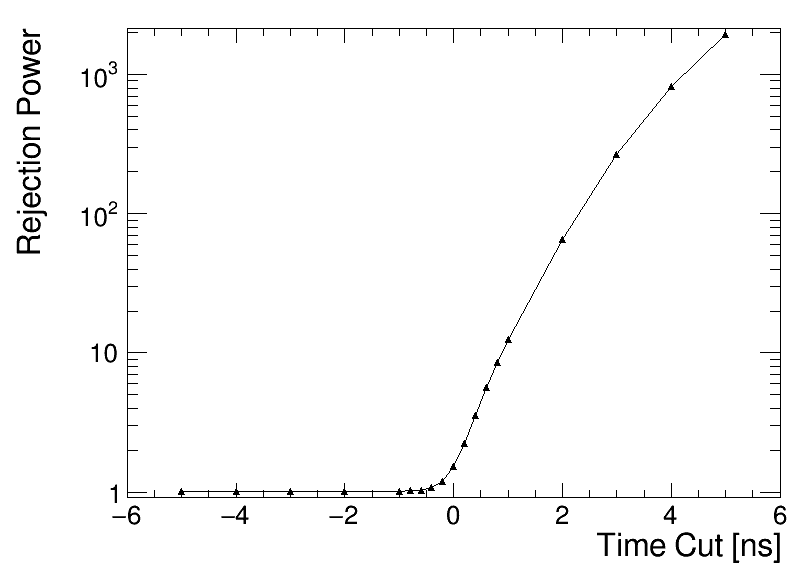

In [8]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.68,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

# hrej_i = {}

t_cuts = np.array(t_cuts) 
power = np.array(Power_rej_i) 
num = len(t_cuts)
#print num, t_cuts, power
hrej_i = rt.TGraph(num , t_cuts, power)

hrej_i.SetLineColor(std_color_list[i])
hrej_i.SetMarkerColor(std_color_list[i])
hrej_i.SetMarkerStyle(22+i)
#     hrej[m].SetMarkerSize(2)


leg.SetBorderSize(0)

hrej_i.SetTitle( 'Rejection Power' )
hrej_i.GetXaxis().SetTitle( 'Time Cut [ns]' )
#hrej[m].GetXaxis().SetRangeUser(-10,10)
hrej_i.GetYaxis().SetRangeUser(0,10000)
hrej_i.GetYaxis().SetTitle( 'Rejection Power' )
hrej_i.Draw('ALP')


leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_Inclusive_Time.png')
c.SaveAs(out_dir+'RejectionPower_Inclusive_Time.pdf')


 FCN=573383 FROM MIGRAD    STATUS=CONVERGED      87 CALLS          88 TOTAL
                     EDM=5.10186e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.38472e+03   1.17678e+00   3.40981e-01  -3.06102e-05
   2  Mean        -1.15655e-01   4.41757e-05   1.63012e-05   4.59736e-02
   3  Sigma        3.05231e-01   3.49398e-05   1.04780e-05  -1.02355e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_fit.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_leading_fit.pdf has been created


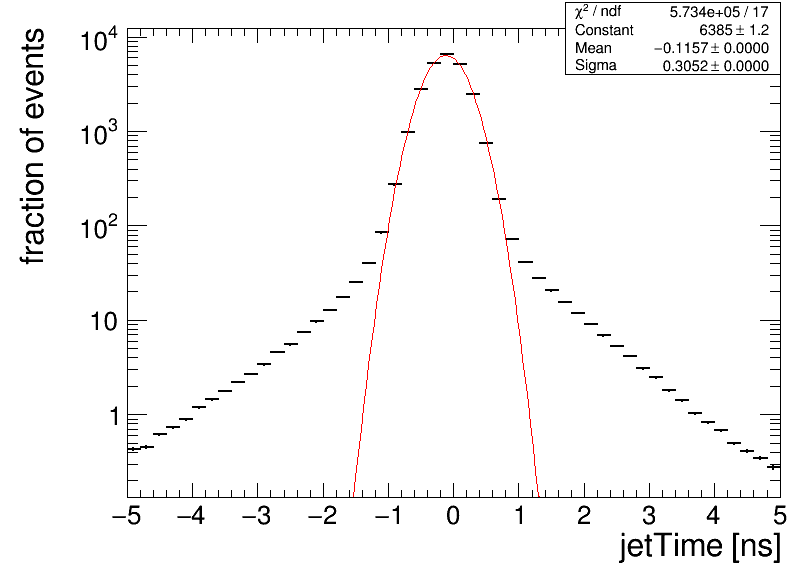

In [10]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
t = jetTime[:,0]
ht0 = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5],weights = weight)
ht0.SetLineColor(std_color_list[i])
ht0.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht0,HT)
leg.SetBorderSize(0)

ht0.DrawNormalized('')
ht0.Fit('gaus','','',-2,2)
 
# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_leading_fit.png')
c.SaveAs(out_dir+'JetTime_leading_fit.pdf')

 FCN=847262 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.64363e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.68124e+03   1.08130e+00   3.71401e-01  -6.34107e-06
   2  Mean        -1.12984e-01   4.92272e-05   2.21152e-05   2.97875e+00
   3  Sigma        3.38282e-01   4.15185e-05   1.32066e-05  -2.76944e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_subleading_fit.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_subleading_fit.pdf has been created


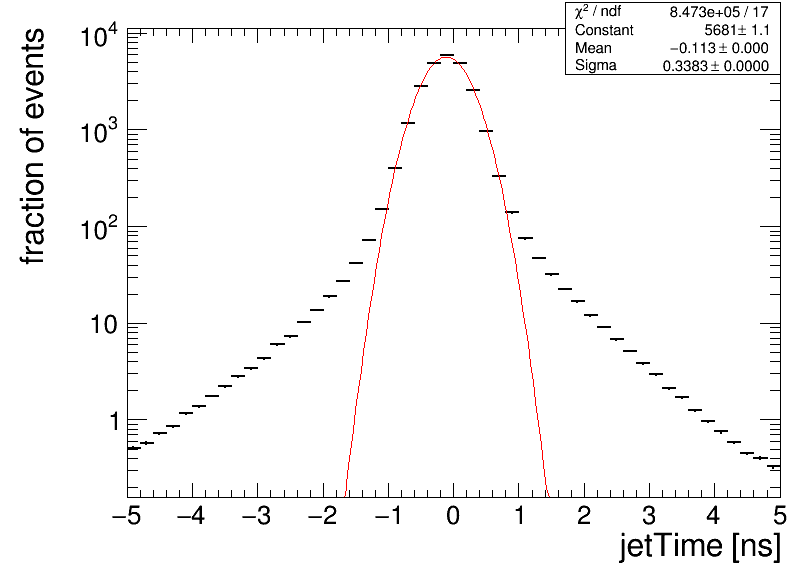

In [12]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

# jetTime = tree['jetTime'].array()
# weight = tree['weight'].array()
t = jetTime[:,1]
ht1 = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5],weights = weight)
ht1.SetLineColor(std_color_list[i])
ht1.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht1,HT)
leg.SetBorderSize(0)

ht1.DrawNormalized('')
ht1.Fit('gaus','','',-2,2)
  
# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_subleading_fit.png')
c.SaveAs(out_dir+'JetTime_subleading_fit.pdf')

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=3.75612e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65674e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36568e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41493e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all_fit.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all_fit.pdf has been created


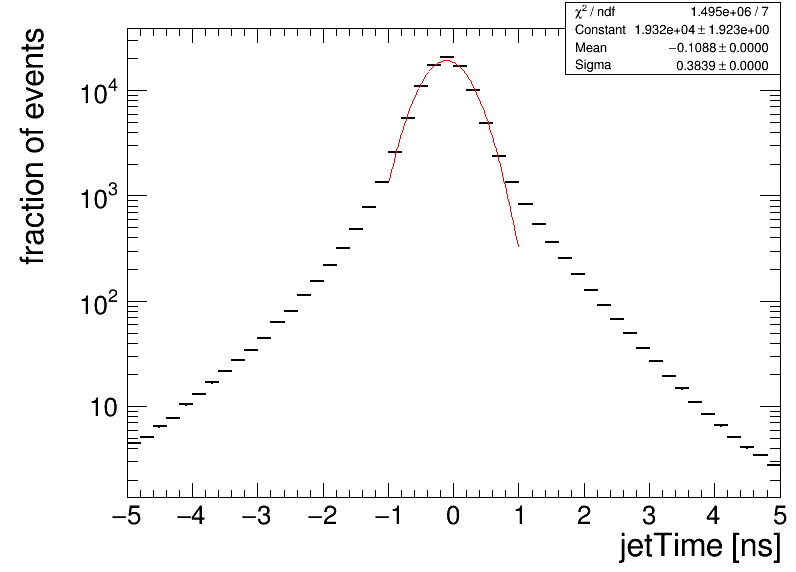

In [16]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
ht.Fit('gaus','','',-1,1)

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit.png')
c.SaveAs(out_dir+'JetTime_all_fit.pdf')

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00
 FCN=1.02088e+07 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.02743e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.85273e+04   1.92287e+00  -2.49098e-03  -1.80780e-06
   2  Mean        -1.13021e-01   2.97890e-05  -1.82183e-07   2.95018e-02
   3  Sigma 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all_fit2.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190506/JetTime_all_fit2.pdf has been created


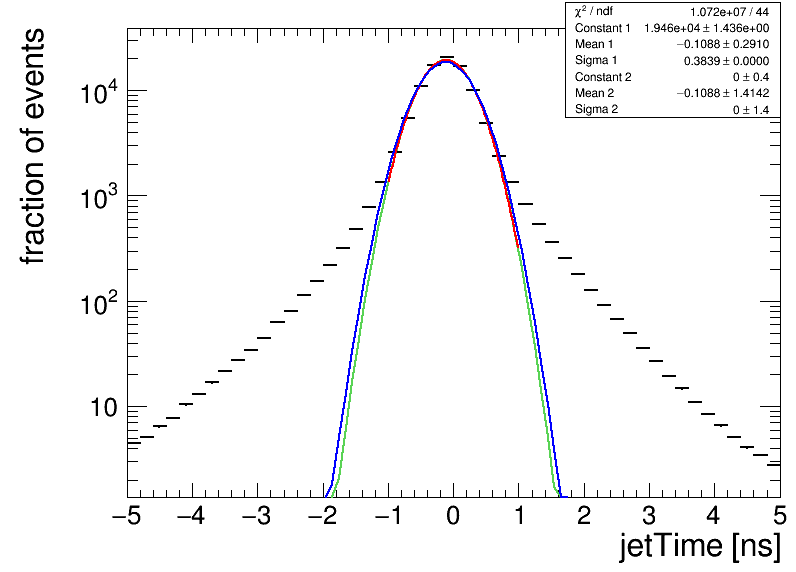

In [23]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
# ht.Fit('gaus','','',-1,1)

g1 = rt.TF1('m1','gaus',-1,1)
g1.SetLineWidth(2)
g1.SetLineColor(std_color_list[i+1])
g2 = rt.TF1('m2','gaus',-10,10)
g2.SetLineWidth(2)
g2.SetLineColor(std_color_list[i+2])

f1 = rt.TF1("double_gaus", "gaus(0) + gaus(3)", -10, 10);
f1.SetParNames("Constant 1", "Mean 1", "Sigma 1","Constant 2", "Mean 2", "Sigma 2");
f1.SetLineWidth(2)
f1.SetLineColor(std_color_list[i+3])

ht.Fit(g1, "R")
ht.Fit(g2, "R")
    
# f1.SetParameter(0,g1.GetParameter(1))
f1.SetParameter(1,g1.GetParameter(1))
f1.SetParameter(2,g1.GetParameter(2))
# f1.SetParameter(3,g2.GetParameter(1))
f1.SetParameter(4,g1.GetParameter(1))
# f1.SetParameter(4,g2.GetParameter(1))
# f1.SetParameter(5,g2.GetParameter(2))
# print(g1.GetParameter(1))

    
ht.Fit(f1,'R')  
f1.Draw('Lsame')
g1.Draw('Lsame')
g2.Draw('Lsame')

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit2.png')
c.SaveAs(out_dir+'JetTime_all_fit2.pdf')